<a href="https://colab.research.google.com/github/Yucheol-Son-BYUI/CSE310_W0_HelloWorld/blob/main/local_biker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Dense
from sklearn.metrics import root_mean_squared_error, r2_score
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

In [ ]:
df

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
0,1/1/2011,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,0
1,1/1/2011,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,0
2,1/1/2011,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,0
3,1/1/2011,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,0
4,1/1/2011,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
112470,10/31/2023,19.0,241,594,10.2,10.2,0.4516,8.4,2,4,0,1
112471,10/31/2023,20.0,171,450,8.9,7.5,0.5268,9.3,1,4,0,1
112472,10/31/2023,21.0,176,402,7.7,6.4,0.5756,7.8,1,4,0,1
112473,10/31/2023,22.0,106,257,8.0,8.0,0.5604,0.0,1,4,0,1


In [ ]:
# Data exploration & preprocessing & feature engineering

In [ ]:
# categorize(카테고리로 변환)
df["season"] = df["season"].astype("category")
df["weathersit"] = df["weathersit"].astype("category")
df["holiday"] = df["holiday"].astype("category")
df["workingday"] = df["workingday"].astype("category")
df["dteday"] = pd.to_datetime(df["dteday"])

# 1st Feature engineering
df['year'] = pd.to_datetime(df['dteday']).dt.year
df['month'] = pd.to_datetime(df['dteday']).dt.month
df['dayofweek'] = df['dteday'].dt.dayofweek
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)


In [ ]:
print(df.describe(include="number"))
df.describe(exclude="number")

                  hr         casual     registered         temp_c  \
count  112475.000000  112475.000000  112475.000000  112475.000000   
mean       11.501098      90.434612     249.193625      15.376487   
std         6.921864     128.655621     258.267544       9.749467   
min         0.000000       0.000000       0.000000     -14.700000   
25%         6.000000       7.000000      48.000000       7.600000   
50%        12.000000      36.000000     180.000000      16.000000   
75%        18.000000     122.000000     360.000000      23.500000   
max        23.000000    1244.000000    1702.000000      40.500000   

        feels_like_c            hum      windspeed           year  \
count  112475.000000  112475.000000  112475.000000  112475.000000   
mean       14.659325       0.636624      13.100614    2016.921263   
std        11.428324       0.190328       7.857600       3.702171   
min       -24.000000       0.088900       0.000000    2011.000000   
25%         5.400000       0.4841

,dteday,weathersit,season,holiday,workingday
count,112475,112475.0,112475.0,112475.0,112475.0
unique,NaN,4.0,4.0,2.0,2.0
top,NaN,1.0,3.0,0.0,1.0
freq,NaN,78564.0,29328.0,109067.0,76968.0
mean,2017-06-01 00:13:39.638142208,NaN,NaN,NaN,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN
25%,2014-03-17 00:00:00,NaN,NaN,NaN,NaN
50%,2017-06-01 00:00:00,NaN,NaN,NaN,NaN
75%,2020-08-16 00:00:00,NaN,NaN,NaN,NaN
max,2023-10-31 00:00:00,NaN,NaN,NaN,NaN


# Detrending
추세 제거(holdout dataset이 2023년이라서 가능)

KeyboardInterrupt: 

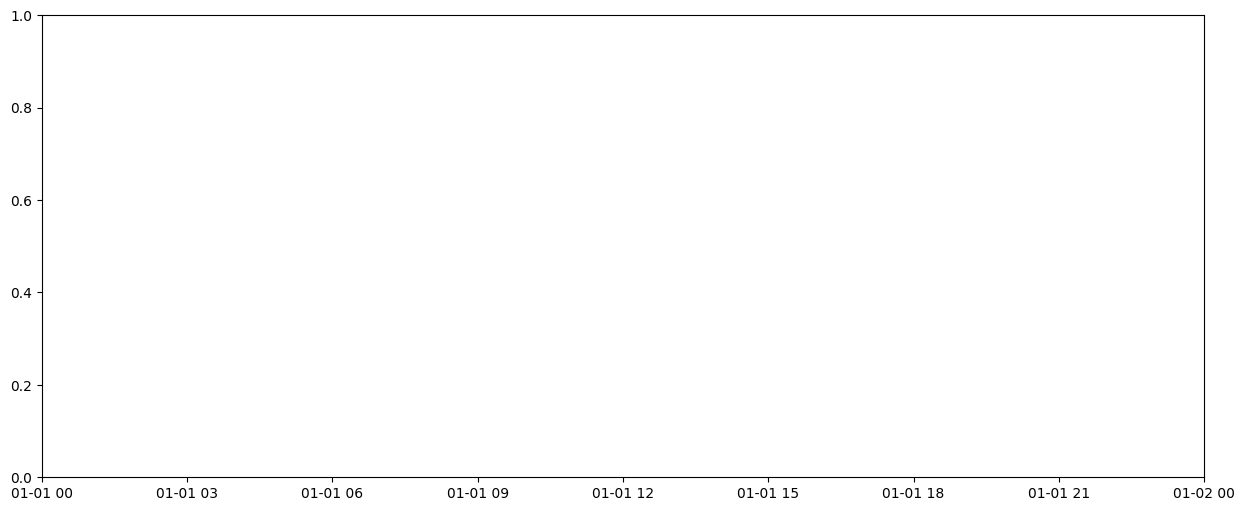

In [ ]:

df['total_count'] = df['casual'] + df['registered']

# 4. 시각화
plt.figure(figsize=(15, 6))
sns.lineplot(x='dteday', y='total_count', data=df)

plt.title('Total Bike Rentals over Time (2011-2012)', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Count (Casual + Registered)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

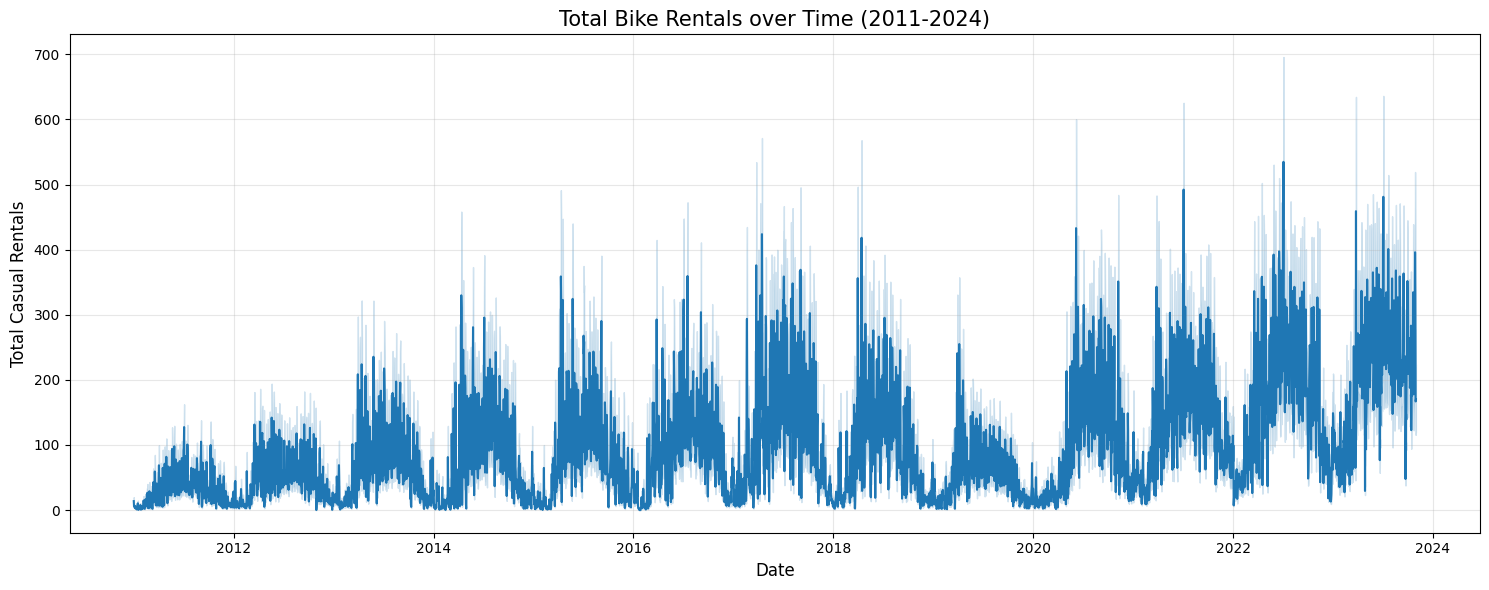

In [ ]:
# 4. 시각화
plt.figure(figsize=(15, 6))
sns.lineplot(x='dteday', y='casual', data=df)

plt.title('Total Bike Rentals over Time (2011-2024)', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Casual Rentals', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

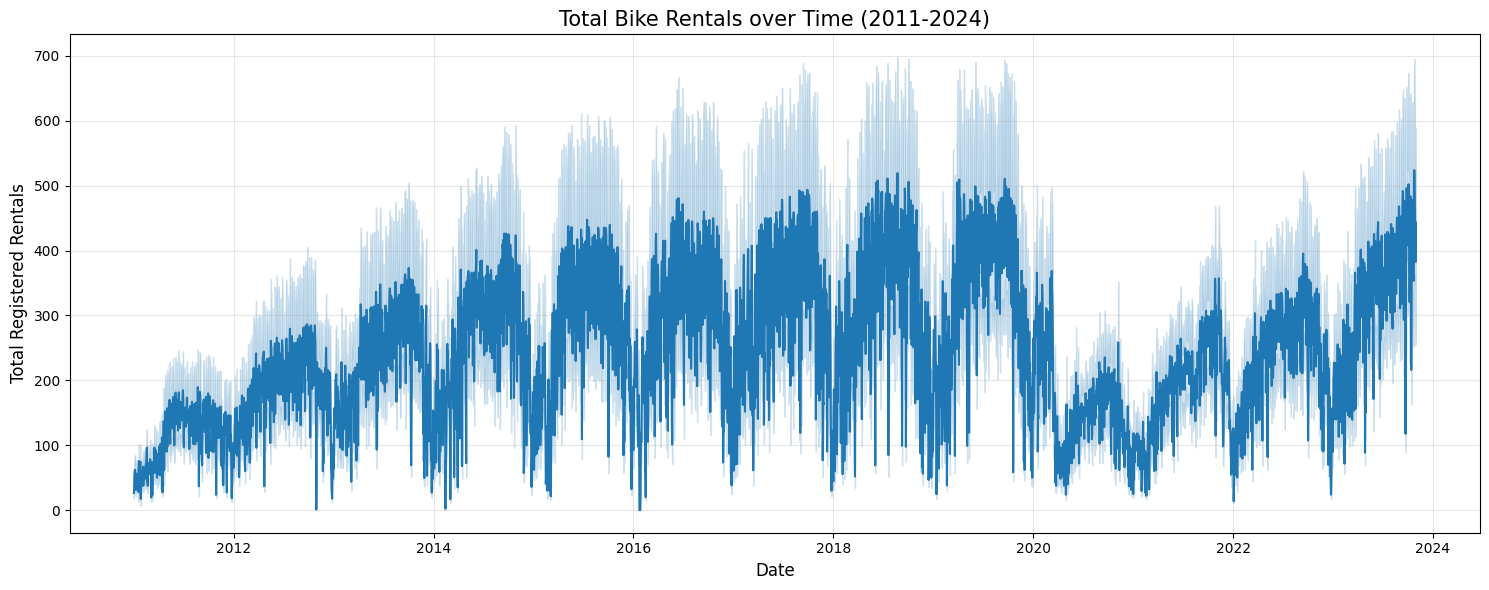

# Feature Engineering

df['dayOfTheWeek'] = df['dteday'].dt.weekday

👉 월별 총합 기준 Casual과 Registered의 상관계수: 0.520


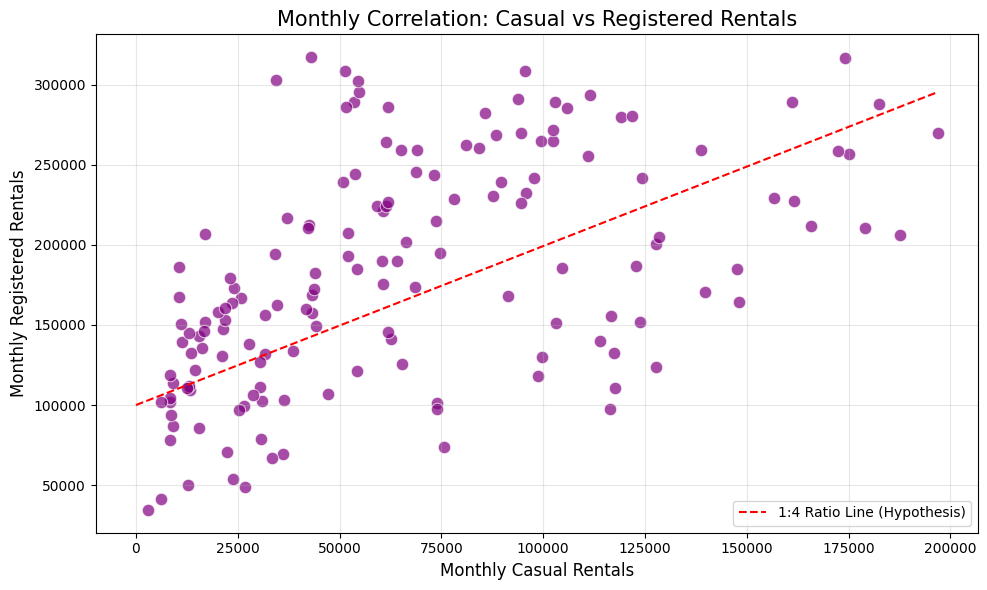

In [ ]:

# (이전 단계에서 df_monthly가 이미 생성되어 있다고 가정합니다)
df_time = df.set_index('dteday')
df_monthly = df_time[['casual', 'registered']].resample('ME').sum()

# 1. 피어슨 상관계수 계산 (월별 데이터 기준)
correlation_monthly = df_monthly['casual'].corr(df_monthly['registered'])
print(f"👉 월별 총합 기준 Casual과 Registered의 상관계수: {correlation_monthly:.3f}")

# 2. 산점도(Scatter Plot) 시각화
plt.figure(figsize=(10, 6))

# 월별 데이터는 개수가 적으므로 점의 크기(s)를 키우고 투명도(alpha)를 조절해 보기 좋게 만듭니다.
sns.scatterplot(x='casual', y='registered', data=df_monthly, s=80, alpha=0.7, color='purple')

# 3. 기준선(가설) 그려보기 (예: Casual 1 : Registered 4 비율)
max_casual_monthly = df_monthly['casual'].max()
plt.plot([0, max_casual_monthly], [100000, max_casual_monthly * 1.5],
         color='red', linestyle='--', label='1:4 Ratio Line (Hypothesis)')

plt.title('Monthly Correlation: Casual vs Registered Rentals', fontsize=15)
plt.xlabel('Monthly Casual Rentals', fontsize=12)
plt.ylabel('Monthly Registered Rentals', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

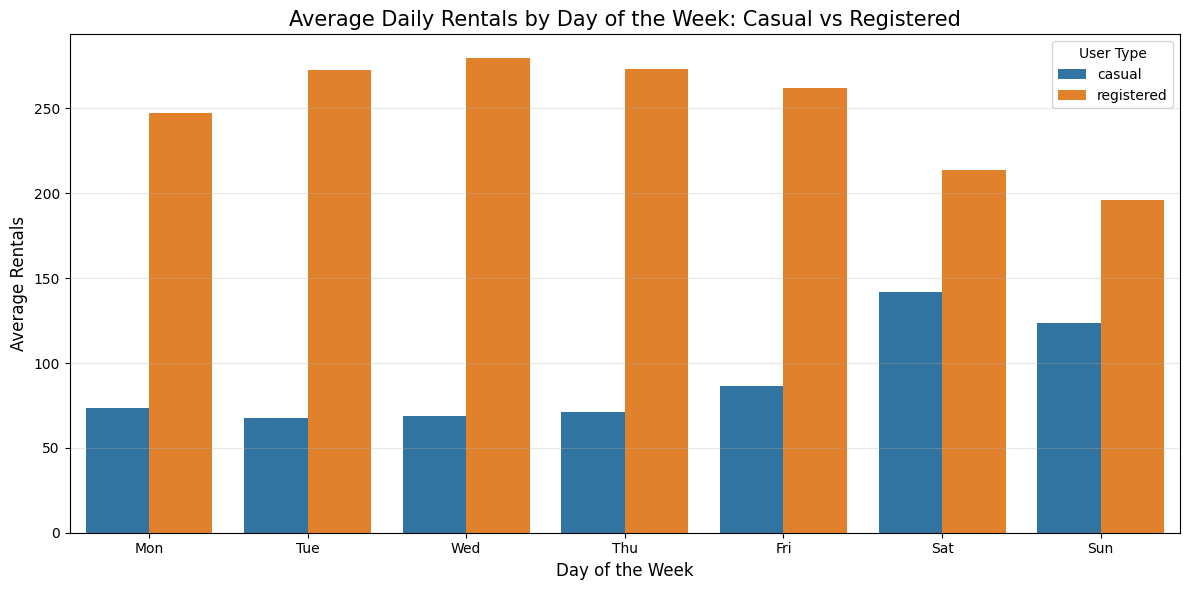

👉 Casual과 Registered의 상관계수: 0.512


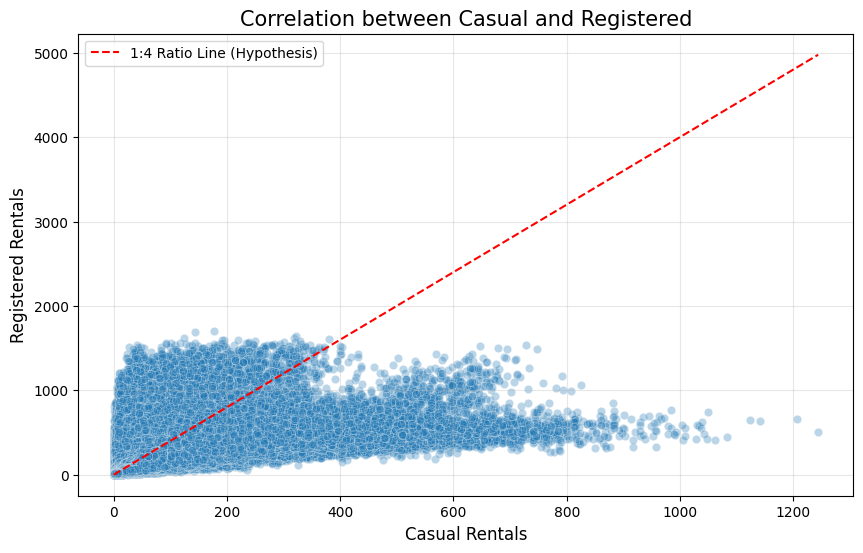

In [ ]:


# 1. 피어슨 상관계수(Pearson Correlation) 계산
# 1에 가까울수록 완벽한 양의 비례, 0이면 관계없음, -1이면 반비례를 뜻합니다.
correlation = df['casual'].corr(df['registered'])
print(f"👉 Casual과 Registered의 상관계수: {correlation:.3f}")

# 2. 산점도(Scatter Plot) 그리기
plt.figure(figsize=(10, 6))

# 투명도(alpha)를 주어 점이 많이 겹치는 구간을 파악합니다.
sns.scatterplot(x='casual', y='registered', data=df, alpha=0.3)

# 3. 기준선(가설) 그려보기 (예: Casual 1 : Registered 4 비율이라면?)
max_casual = df['casual'].max()
plt.plot([0, max_casual], [0, max_casual * 4], color='red', linestyle='--', label='1:4 Ratio Line (Hypothesis)')

plt.title('Correlation between Casual and Registered', fontsize=15)
plt.xlabel('Casual Rentals', fontsize=12)
plt.ylabel('Registered Rentals', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11588\3330351335.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_wind = df.groupby('wind_bin')[['casual', 'registered']].mean().reset_index()


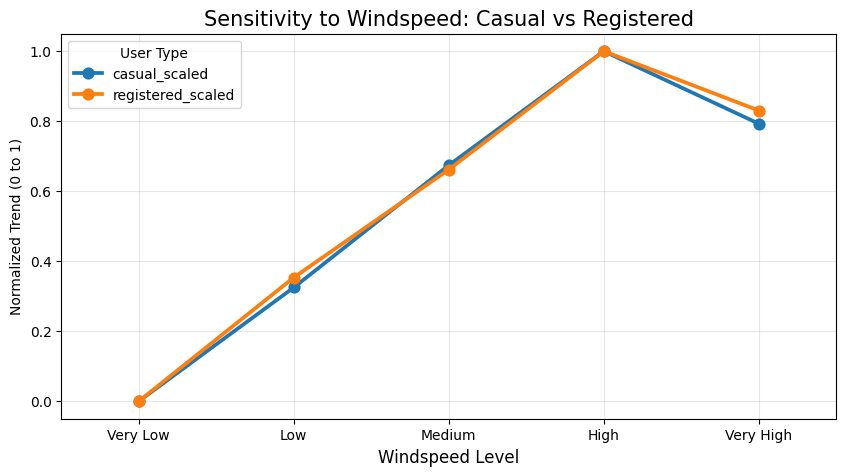

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11588\3330351335.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hum = df.groupby('hum_bin')[['casual', 'registered']].mean().reset_index()


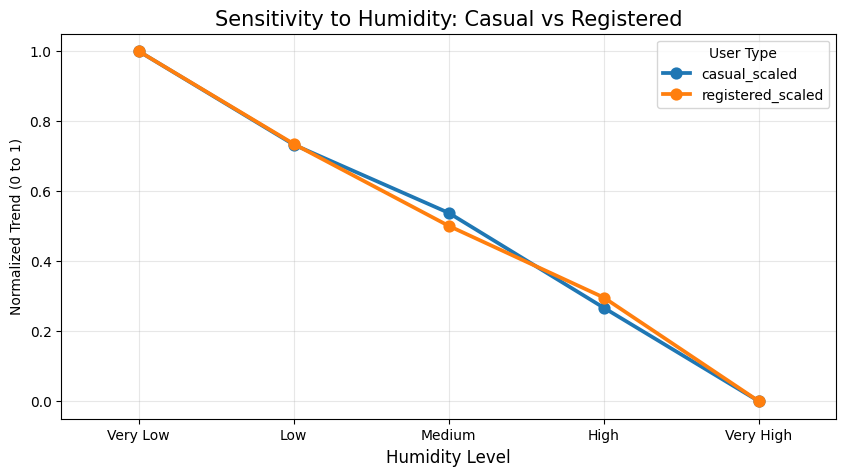

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 1. 구간(Bin) 나누기 (앞서 한 것과 동일)
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['wind_bin'] = pd.qcut(df['windspeed'], q=5, labels=bin_labels, duplicates='drop')
df['hum_bin'] = pd.qcut(df['hum'], q=5, labels=bin_labels, duplicates='drop')

# 스케일러 준비 (0 ~ 1 사이로 변환)
# 공식: (x - min) / (max - min)
scaler = MinMaxScaler()

# ==========================================
# [그래프 1] 풍속(windspeed) 민감도 비교
# ==========================================

# 2. 구간별 평균 구하기
df_wind = df.groupby('wind_bin')[['casual', 'registered']].mean().reset_index()

# 3. 구한 평균값에 대해 Min-Max 스케일링 적용 (각각 0~1로 맞춰짐)
df_wind[['casual_scaled', 'registered_scaled']] = scaler.fit_transform(df_wind[['casual', 'registered']])

# 4. 시각화를 위해 Melt
df_wind_melted = df_wind.melt(id_vars=['wind_bin'],
                              value_vars=['casual_scaled', 'registered_scaled'],
                              var_name='User Type', value_name='Normalized Trend (0 to 1)')

# 5. 시각화 (선/점 그래프로 추세 꺾임 비교)
plt.figure(figsize=(10, 5))
sns.pointplot(x='wind_bin', y='Normalized Trend (0 to 1)', hue='User Type', data=df_wind_melted,
              palette={'casual_scaled': '#1f77b4', 'registered_scaled': '#ff7f0e'})

plt.title('Sensitivity to Windspeed: Casual vs Registered', fontsize=15)
plt.xlabel('Windspeed Level', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


# ==========================================
# [그래프 2] 습도(hum) 민감도 비교
# ==========================================

# 6. 구간별 평균 및 스케일링
df_hum = df.groupby('hum_bin')[['casual', 'registered']].mean().reset_index()
df_hum[['casual_scaled', 'registered_scaled']] = scaler.fit_transform(df_hum[['casual', 'registered']])

# 7. 시각화를 위해 Melt
df_hum_melted = df_hum.melt(id_vars=['hum_bin'],
                            value_vars=['casual_scaled', 'registered_scaled'],
                            var_name='User Type', value_name='Normalized Trend (0 to 1)')

# 8. 시각화
plt.figure(figsize=(10, 5))
sns.pointplot(x='hum_bin', y='Normalized Trend (0 to 1)', hue='User Type', data=df_hum_melted,
              palette={'casual_scaled': '#1f77b4', 'registered_scaled': '#ff7f0e'})

plt.title('Sensitivity to Humidity: Casual vs Registered', fontsize=15)
plt.xlabel('Humidity Level', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
import numpy as np
df['ratio'] = df['registered'] / df['casual']
# inf를 NaN으로 바꾼 뒤 dropna()로 제거하고 통계치 확인
print(df['ratio'].replace([np.inf, -np.inf], np.nan).dropna().describe())

count    105460.000000
mean          8.866095
std          18.521392
min           0.000000
25%           1.690248
50%           3.256757
75%           7.888889
max         639.000000
Name: ratio, dtype: float64


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11588\2910458236.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_weather = df.groupby('weathersit')[['casual', 'registered']].mean().reset_index()


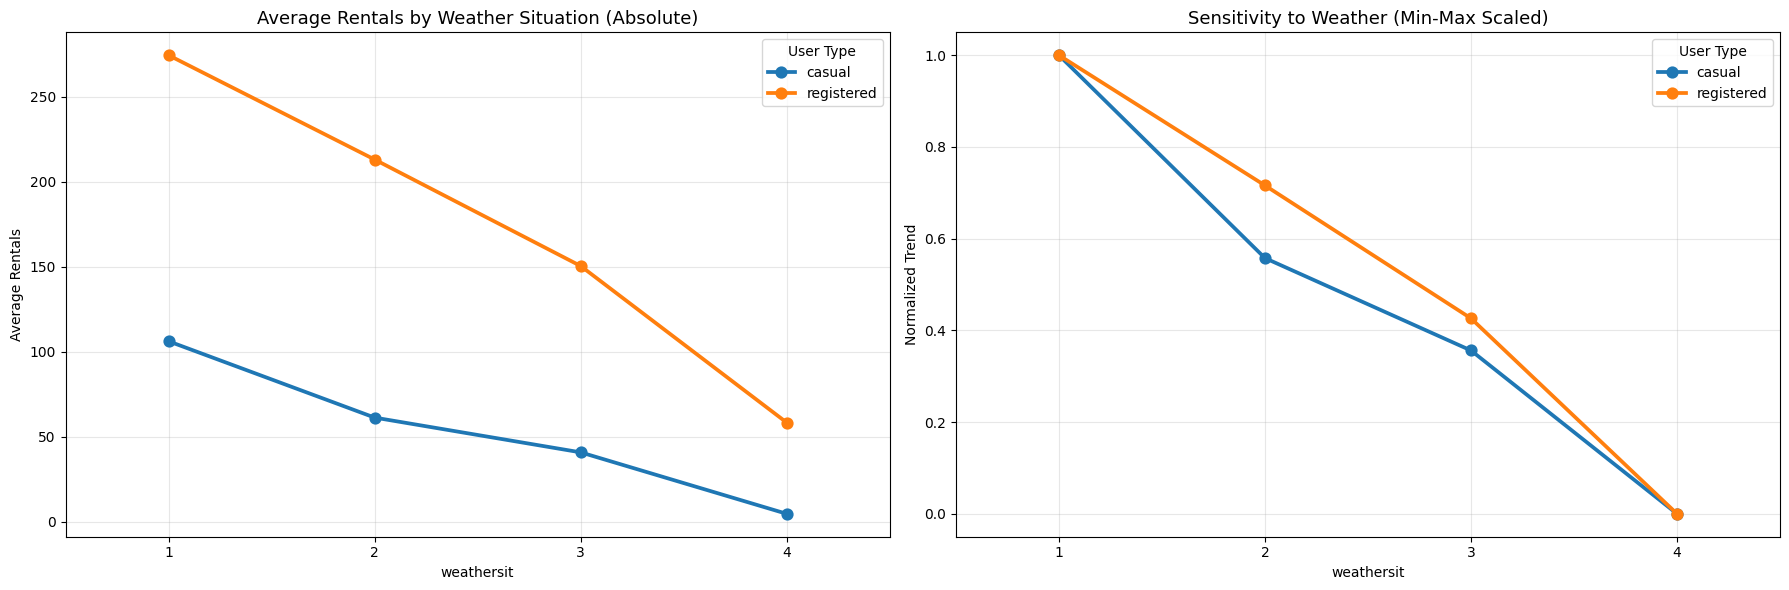

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 1. 날씨 상태별 평균 이용량 계산
df_weather = df.groupby('weathersit')[['casual', 'registered']].mean().reset_index()

# 2. 민감도 비교를 위한 Min-Max 정규화 (각 컬럼을 0~1 사이로)
scaler = MinMaxScaler()
df_weather_scaled = df_weather.copy()
df_weather_scaled[['casual', 'registered']] = scaler.fit_transform(df_weather[['casual', 'registered']])

# 3. 시각화 (서브플롯 활용)
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# [좌측: 실제 평균 수치 비교]
df_melted_abs = df_weather.melt(id_vars='weathersit', value_vars=['casual', 'registered'],
                                 var_name='User Type', value_name='Average Rentals')
sns.pointplot(x='weathersit', y='Average Rentals', hue='User Type', data=df_melted_abs, ax=ax[0],
              palette={'casual': '#1f77b4', 'registered': '#ff7f0e'})
ax[0].set_title('Average Rentals by Weather Situation (Absolute)', fontsize=13)
ax[0].grid(True, alpha=0.3)

# [우측: 정규화된 민감도 추세 비교]
df_melted_scaled = df_weather_scaled.melt(id_vars='weathersit', value_vars=['casual', 'registered'],
                                           var_name='User Type', value_name='Normalized Trend')
sns.pointplot(x='weathersit', y='Normalized Trend', hue='User Type', data=df_melted_scaled, ax=ax[1],
              palette={'casual': '#1f77b4', 'registered': '#ff7f0e'})
ax[1].set_title('Sensitivity to Weather (Min-Max Scaled)', fontsize=13)
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# 0. 연도별로 나누기 위해 dteday에서 'year' 컬럼 추출

# 1. melt를 사용하여 bike_long 만들기
bike_long = df.melt(
    id_vars=['year', 'dteday', 'season', 'hr', 'holiday', 'workingday', 'weathersit', 'temp_c', 'feels_like_c', 'hum', 'windspeed', 'dayofweek', 'is_weekend'],
    value_vars=['casual', 'registered'],
    var_name='user_type',
    value_name='total_users'
)

### 시간대별 이용자수

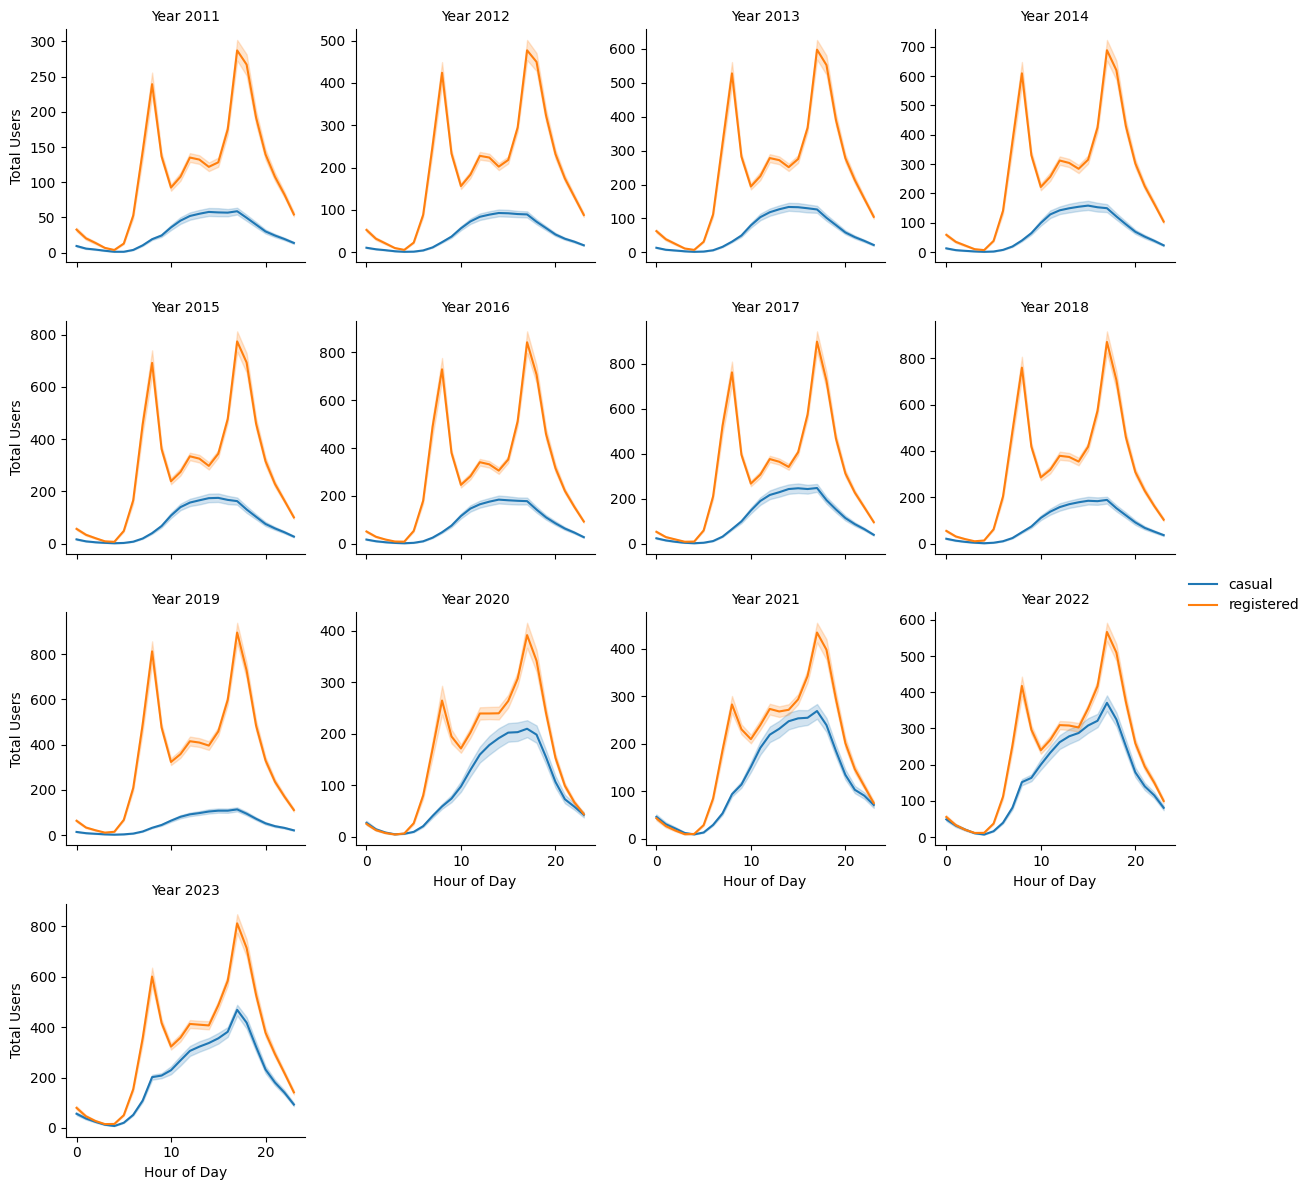

In [ ]:
g = sns.FacetGrid(
    bike_long,
    col="year",
    col_wrap=4,
    height=3,
    sharey=False
)

g.map_dataframe(
    sns.lineplot,
    x="hr",
    y="total_users",
    hue="user_type"
)

g.add_legend()
g.set_axis_labels("Hour of Day", "Total Users")
g.set_titles("Year {col_name}")

plt.show()

### temp_c 온도

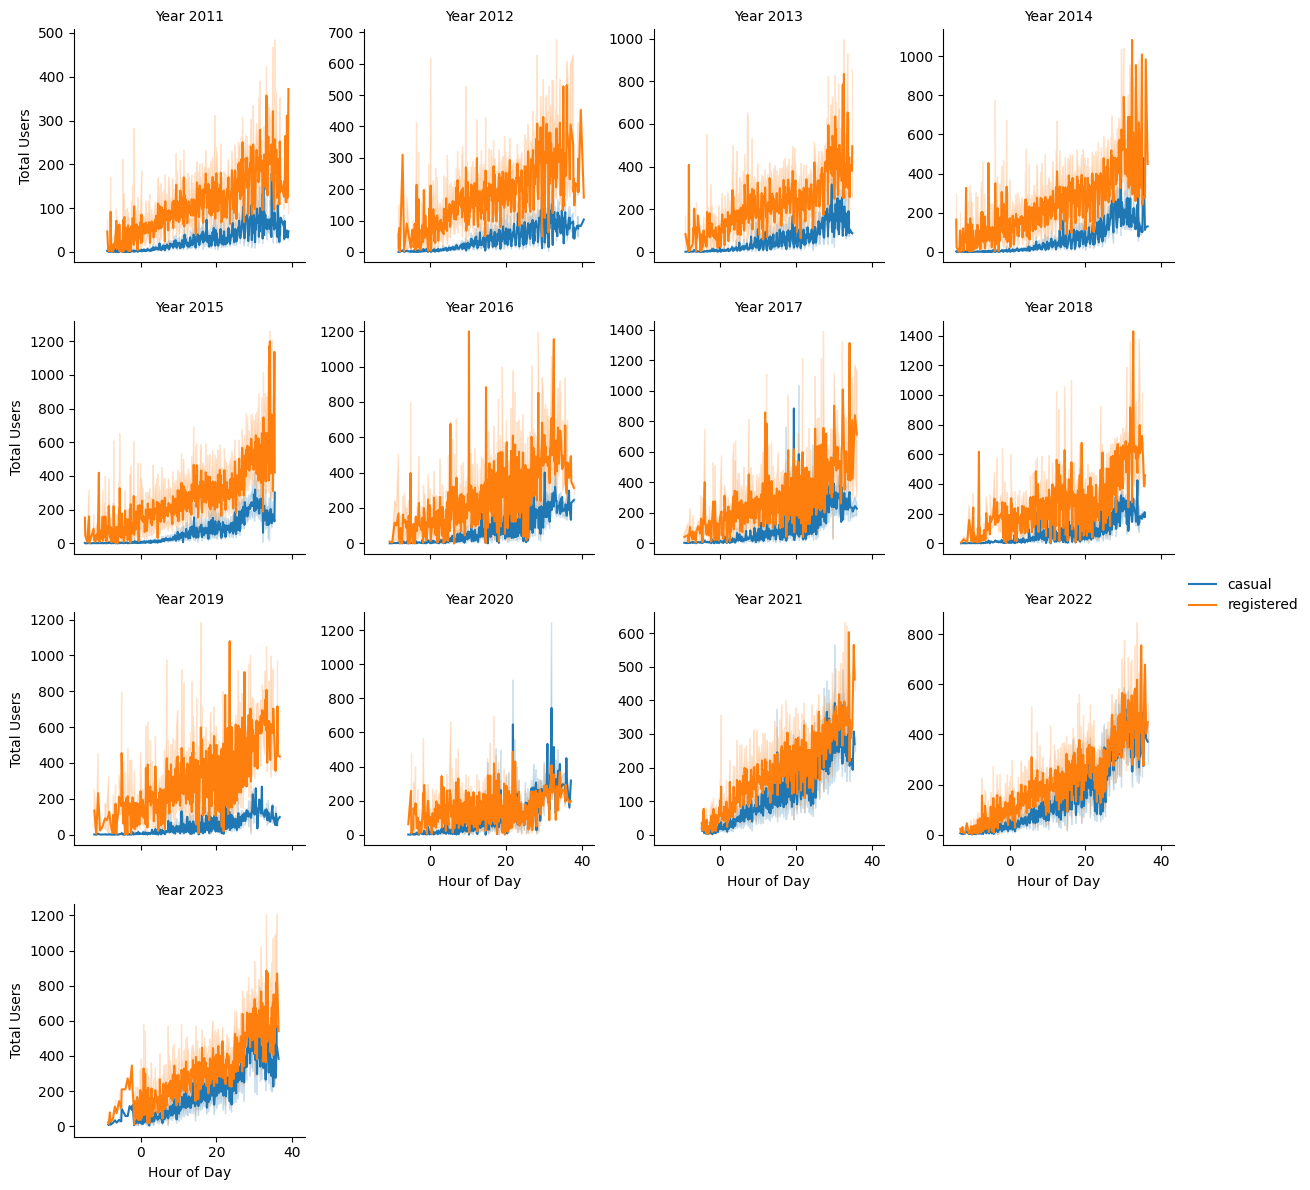

In [ ]:
g = sns.FacetGrid(
    bike_long,
    col="year",
    col_wrap=4,
    height=3,
    sharey=False
)

g.map_dataframe(
    sns.lineplot,
    x="temp_c",
    y="total_users",
    hue="user_type"
)

g.add_legend()
g.set_axis_labels("Hour of Day", "Total Users")
g.set_titles("Year {col_name}")

plt.show()

### Feels_Like_C 체감온도

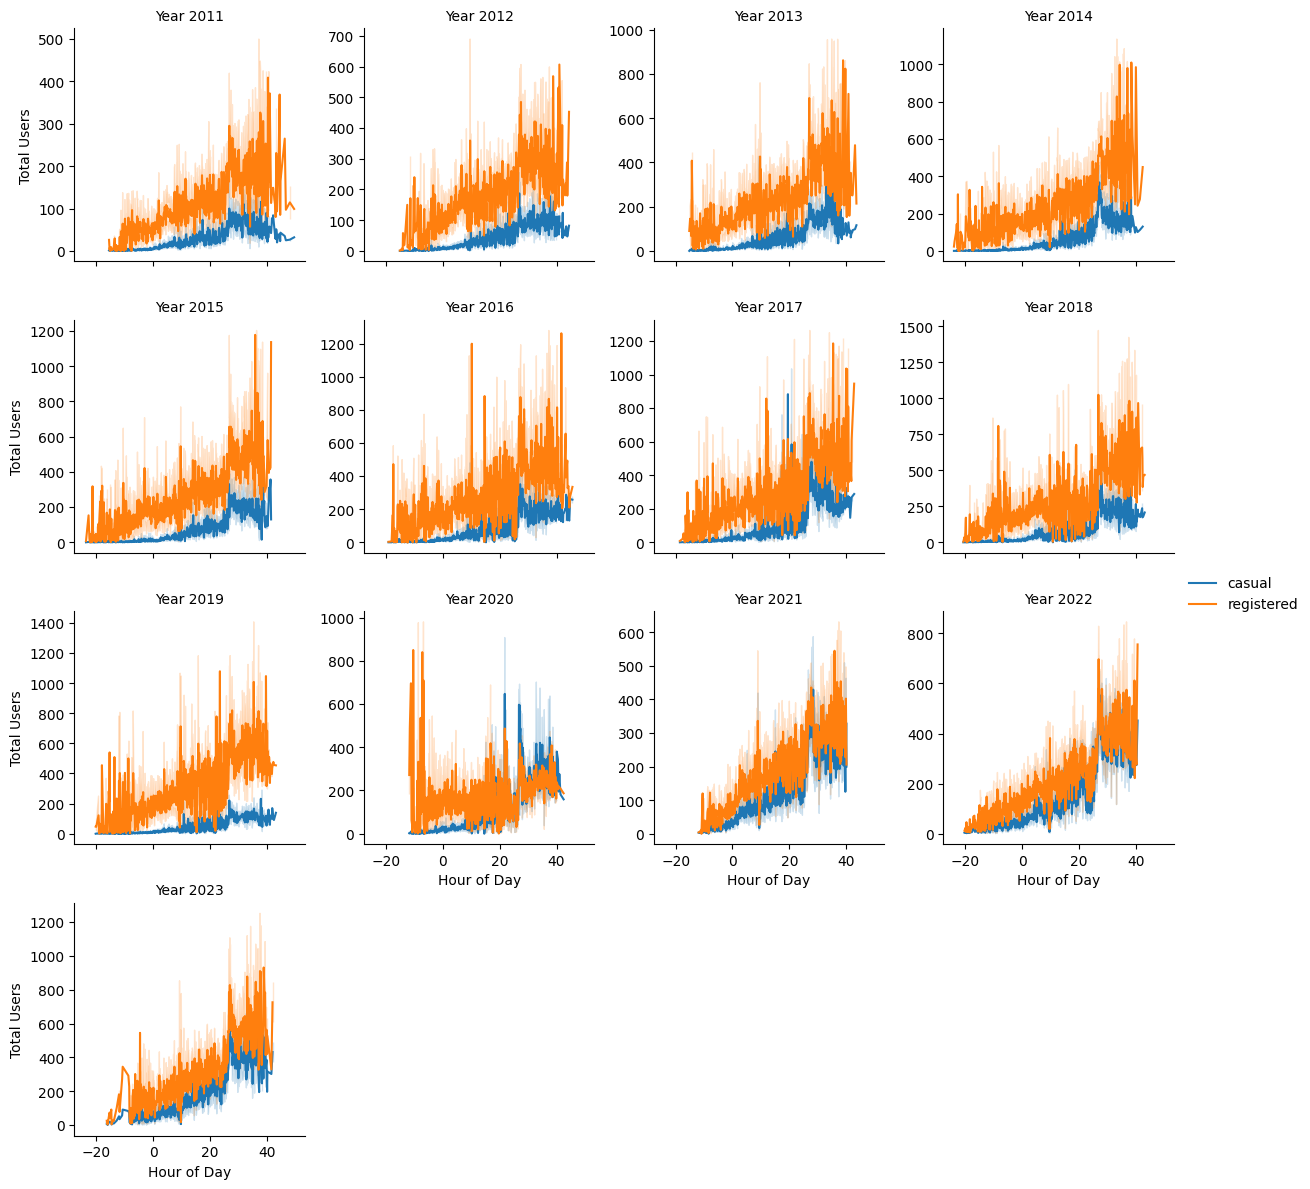

In [ ]:
g = sns.FacetGrid(
    bike_long,
    col="year",
    col_wrap=4,
    height=3,
    sharey=False
)

g.map_dataframe(
    sns.lineplot,
    x="feels_like_c",
    y="total_users",
    hue="user_type"
)

g.add_legend()
g.set_axis_labels("Feels Like Temperature (°C)", "Total Users")
g.set_titles("Year {col_name}")

plt.show()

### Humidity (습도)

c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0

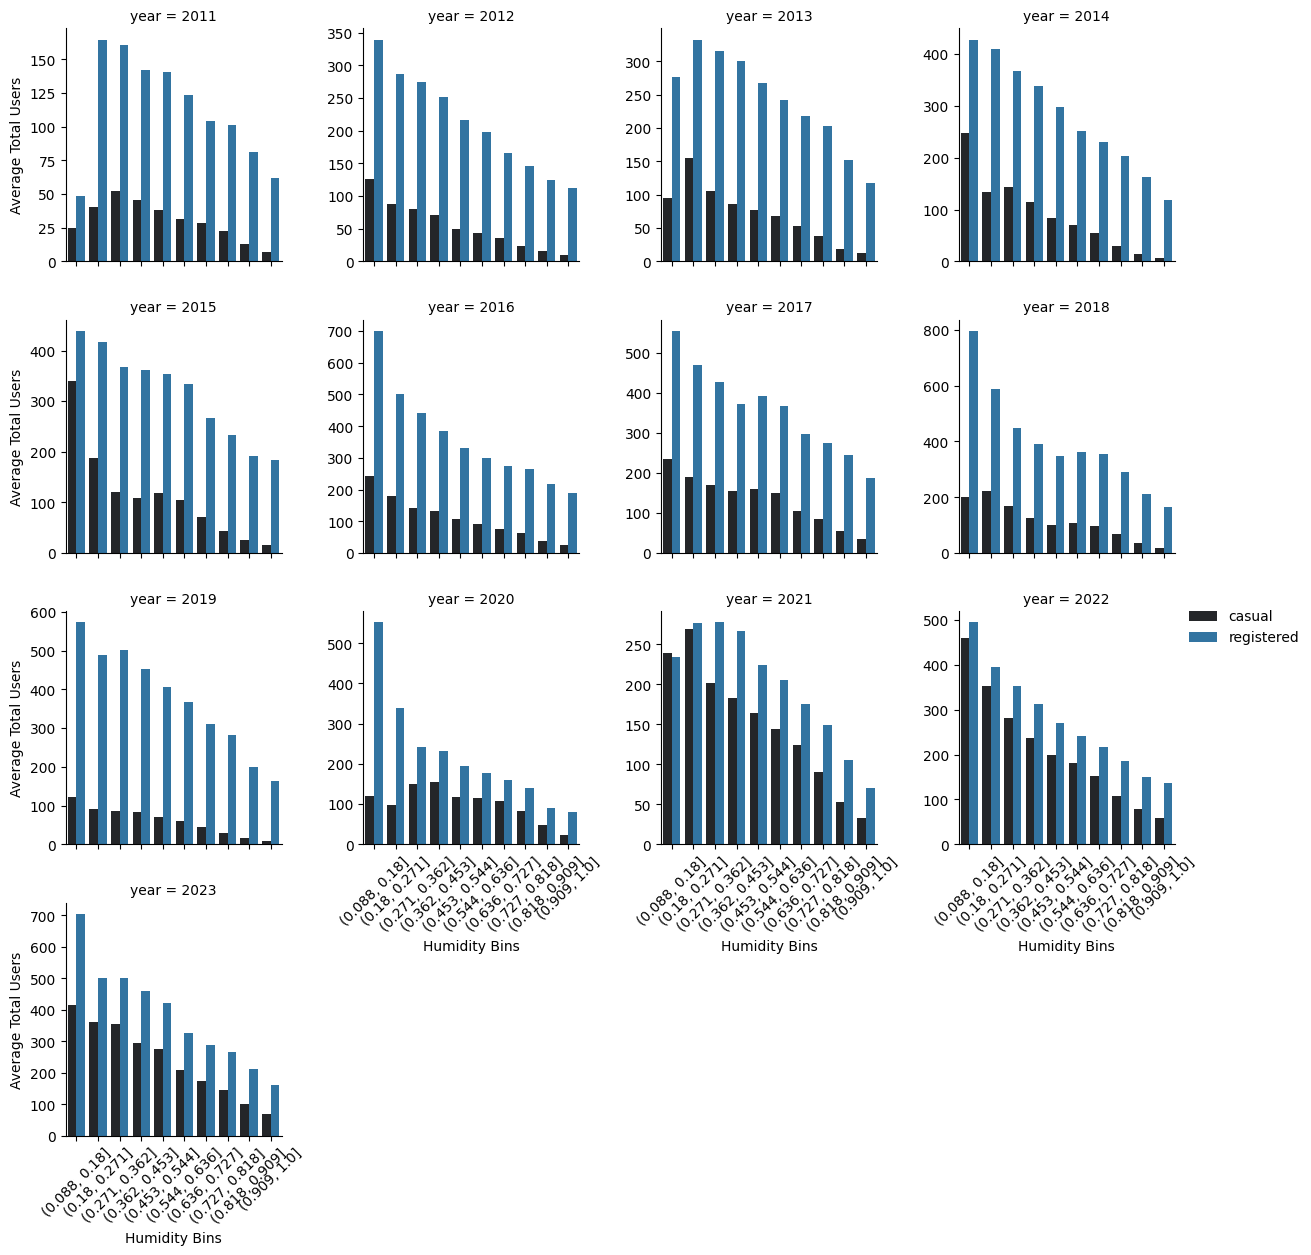

In [ ]:
import pandas as pd

# 1. 습도(hum)를 10개 구간으로 나눕니다 (0.1 단위)
bike_long['hum_bin'] = pd.cut(bike_long['hum'], bins=10)

g = sns.FacetGrid(
    bike_long,
    col="year",
    col_wrap=4,
    height=3,
    sharey=False
)

# 2. 구간화된 습도를 x축에 넣고 막대그래프를 그립니다.
g.map_dataframe(
    sns.barplot,
    x="hum_bin",
    y="total_users",
    hue="user_type",
    errorbar=None
)

g.add_legend()
# x축 라벨이 겹칠 수 있으므로 회전시켜줍니다.
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

g.set_axis_labels("Humidity Bins", "Average Total Users")
plt.show()
plt.close('all')

c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0

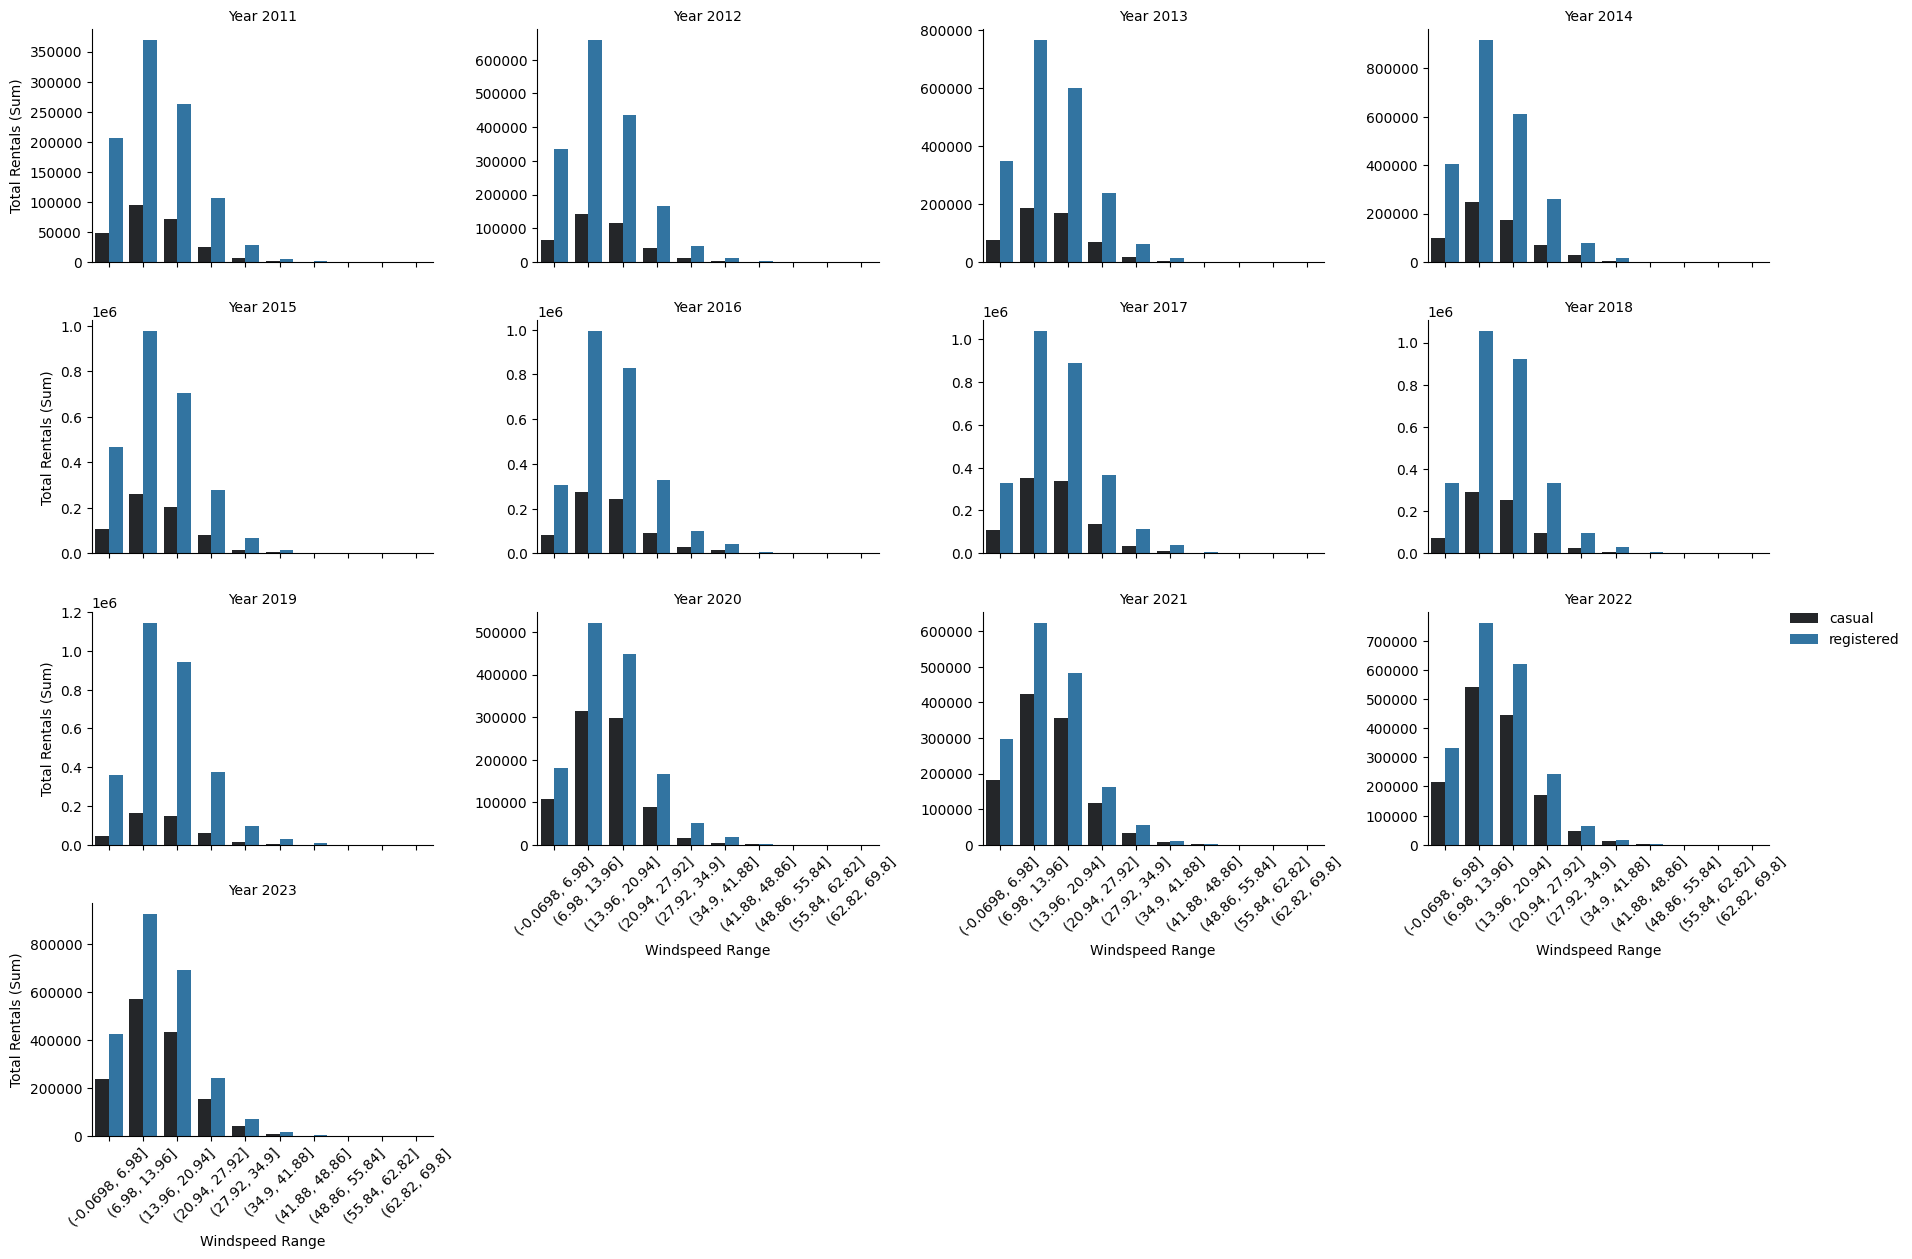

In [ ]:
# 1. windspeed를 10개 구간으로 나눕니다.
# (0에서 최대치까지의 범위를 균등하게 10등분합니다)
bike_long['wind_bin'] = pd.cut(bike_long['windspeed'], bins=10)

# 2. 연도별(year) 패널 생성
g = sns.FacetGrid(
    bike_long,
    col="year",
    col_wrap=4,
    height=3,
    aspect=1.5,
    sharey=False
)

# 3. x축에는 바람 구간, y축에는 대여량(total_users), 색상은 사용자 유형(user_type)
g.map_dataframe(
    sns.barplot,
    x="wind_bin",
    y="total_users",  # melt된 데이터에서 숫자가 들어있는 컬럼
    hue="user_type",
    estimator=sum,    # 해당 구간의 총합을 표시
    errorbar=None
)

g.add_legend()
g.set_axis_labels("Windspeed Range", "Total Rentals (Sum)")
g.set_titles("Year {col_name}")

# x축 라벨이 길어질 수 있으므로 회전
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()
plt.close('all') # 메모리 정리

## 범주형
### weathersit


c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0

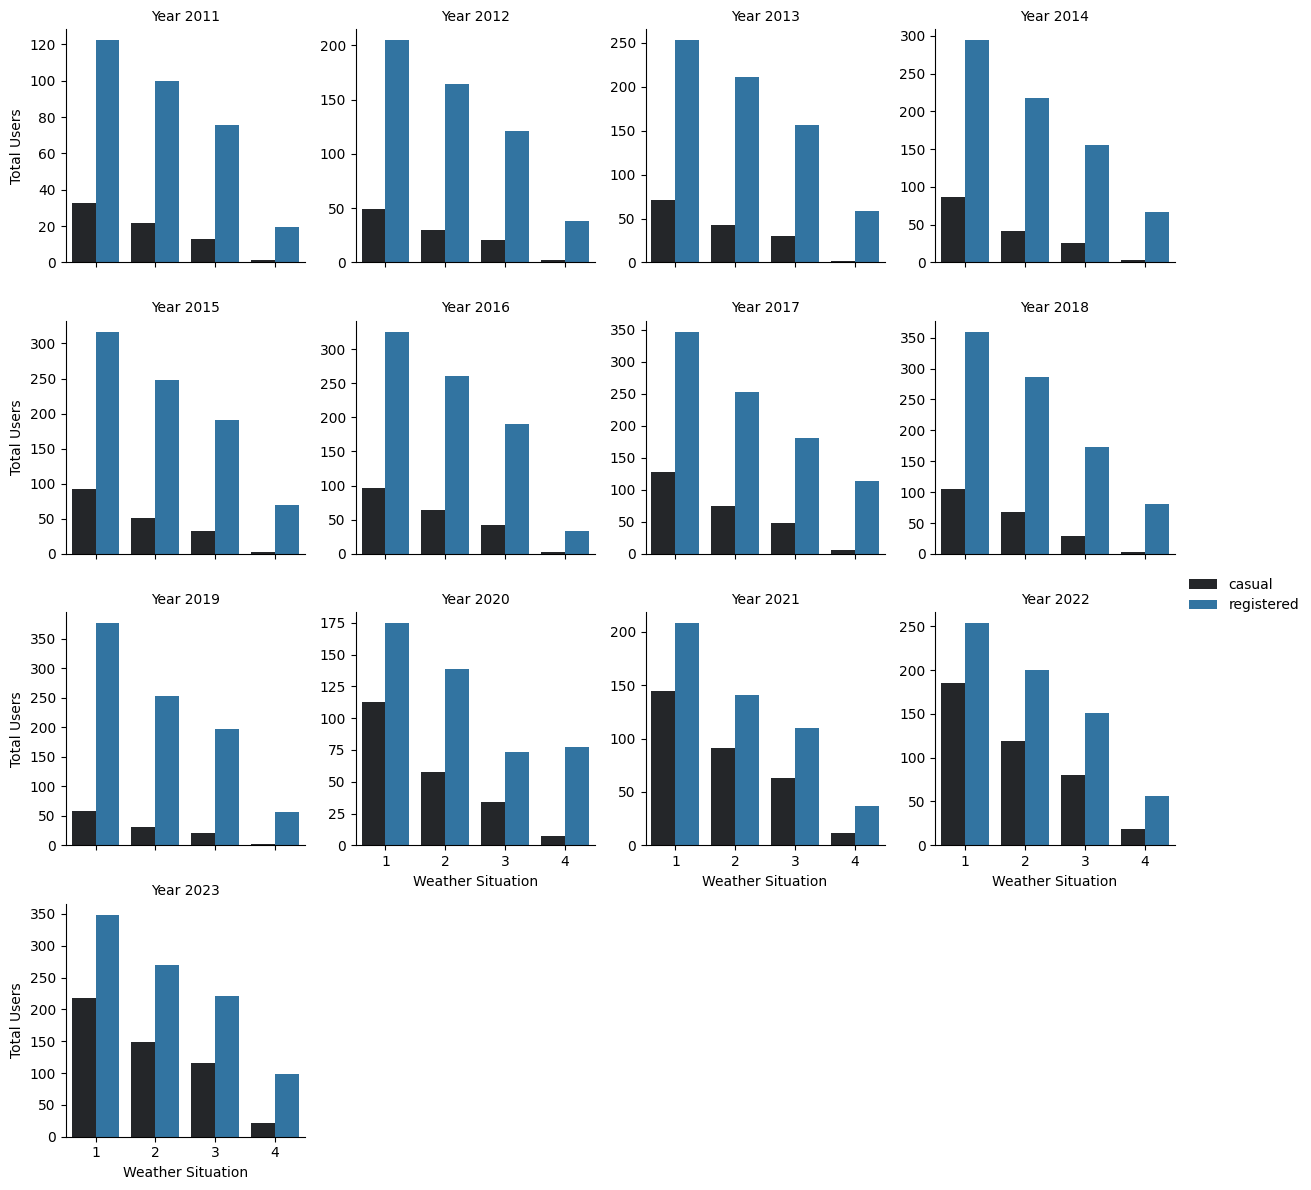

In [ ]:
# 1. 연도별(year) 패널 생성
g = sns.FacetGrid(
    bike_long,
    col="year",
    col_wrap=4,
    height=3,
    sharey=False
)

# 2. 선 그래프 대신 막대 그래프(barplot)로 변경
g.map_dataframe(
    sns.barplot,       # lineplot -> barplot 으로 변경!
    x="weathersit",    # 범주형 변수인 날씨(1~4)
    y="total_users",
    hue="user_type",
    errorbar=None      # 막대 위에 생기는 검은 선(신뢰구간)을 없애서 깔끔하게 보려면 추가 (원하면 빼도 됩니다)
)

g.add_legend()
g.set_axis_labels("Weather Situation", "Total Users")
g.set_titles("Year {col_name}")

plt.show()
plt.close('all')

c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0

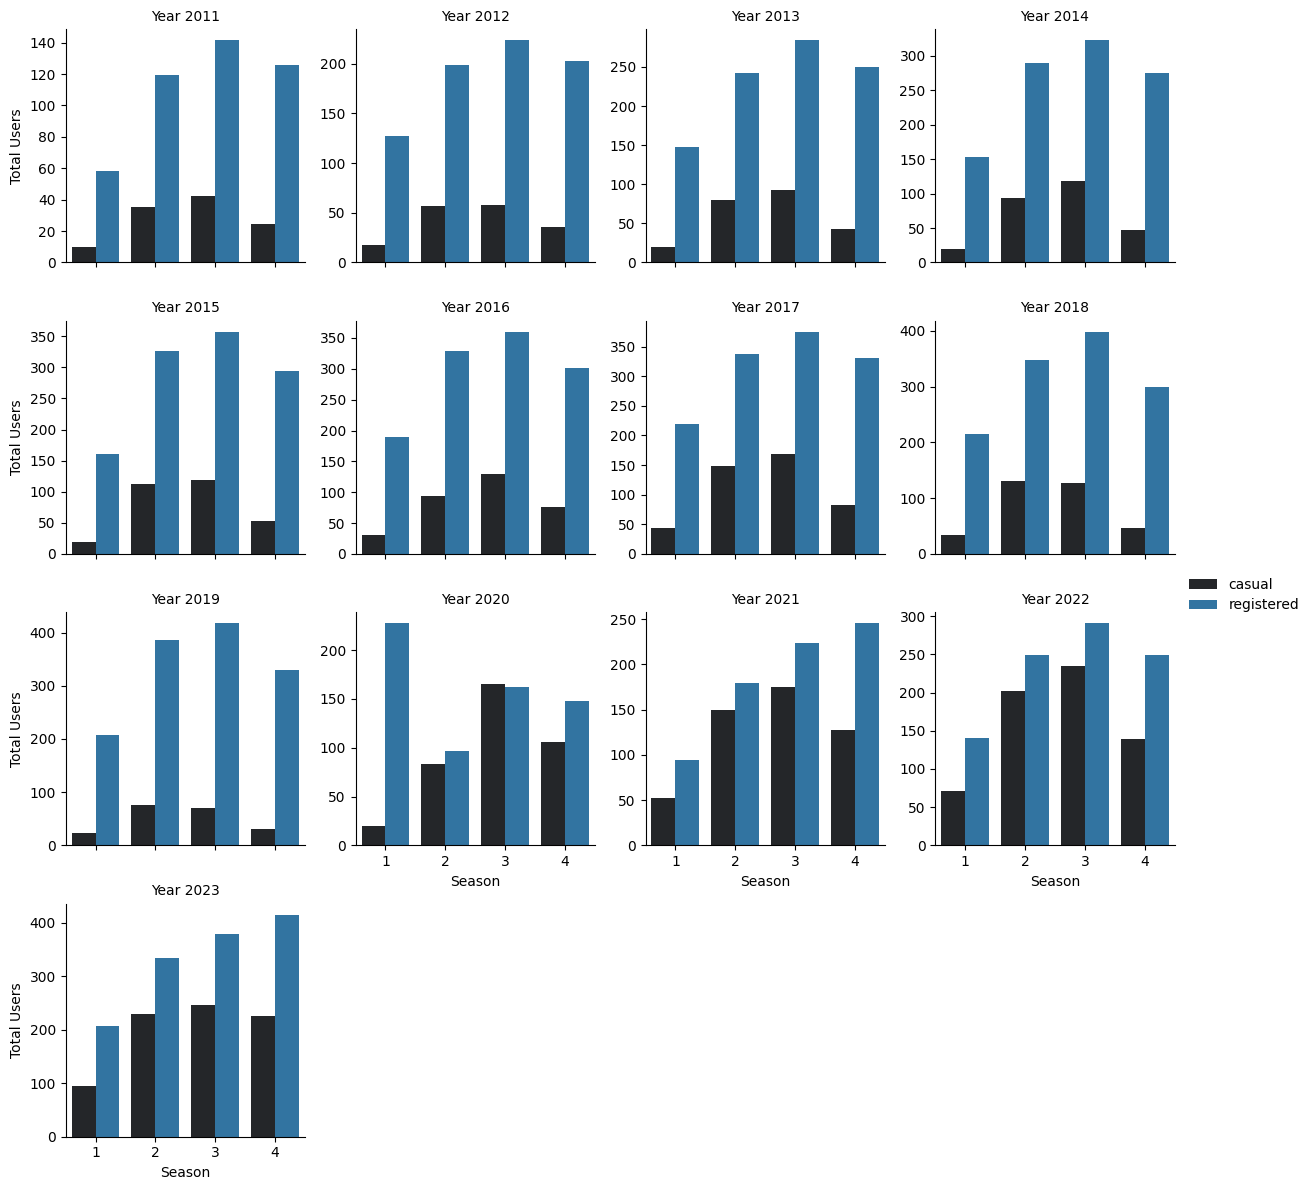

In [ ]:
# 1. 연도별(year) 패널 생성
g = sns.FacetGrid(
    bike_long,
    col="year",
    col_wrap=4,
    height=3,
    sharey=False
)

# 2. 선 그래프 대신 막대 그래프(barplot)로 변경
g.map_dataframe(
    sns.barplot,       # lineplot -> barplot 으로 변경!
    x="season",    # 범주형 변수인 날씨(1~4)
    y="total_users",
    hue="user_type",
    errorbar=None      # 막대 위에 생기는 검은 선(신뢰구간)을 없애서 깔끔하게 보려면 추가 (원하면 빼도 됩니다)
)

g.add_legend()
g.set_axis_labels("Season", "Total Users")
g.set_titles("Year {col_name}")

plt.show()
plt.close('all')

c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0

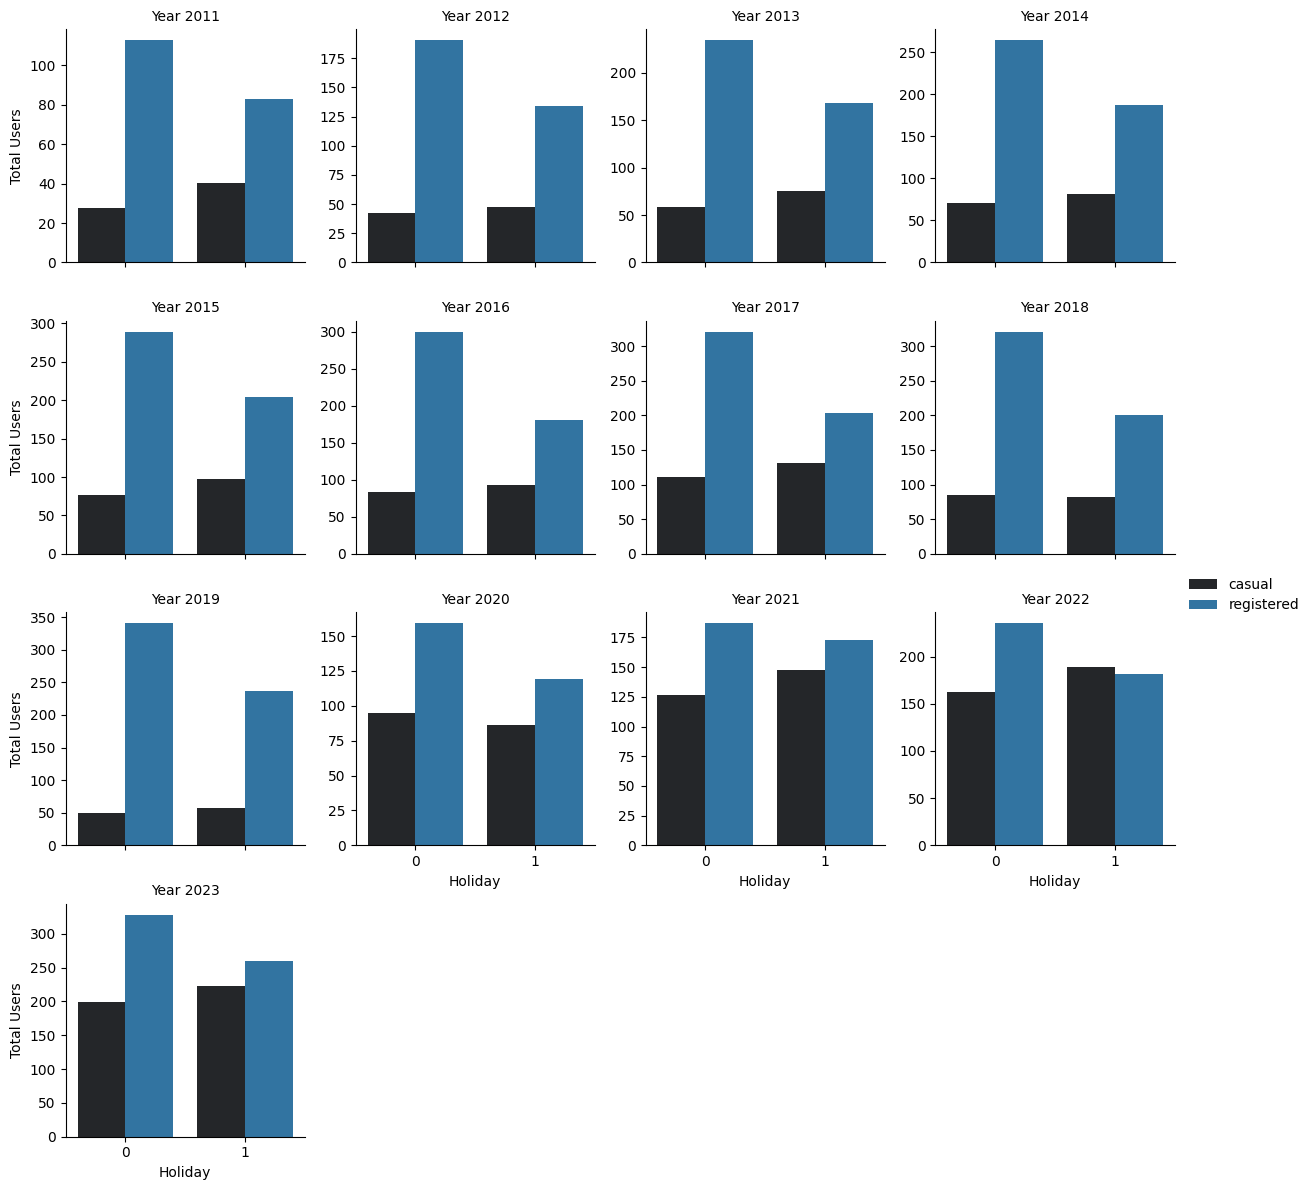

In [ ]:
# 1. 연도별(year) 패널 생성
g = sns.FacetGrid(
    bike_long,
    col="year",
    col_wrap=4,
    height=3,
    sharey=False
)

# 2. 선 그래프 대신 막대 그래프(barplot)로 변경
g.map_dataframe(
    sns.barplot,       # lineplot -> barplot 으로 변경!
    x="holiday",    # 범주형 변수인 날씨(1~4)
    y="total_users",
    hue="user_type",
    errorbar=None      # 막대 위에 생기는 검은 선(신뢰구간)을 없애서 깔끔하게 보려면 추가 (원하면 빼도 됩니다)
)

g.add_legend()
g.set_axis_labels("Holiday", "Total Users")
g.set_titles("Year {col_name}")

plt.show()
plt.close('all')

c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0

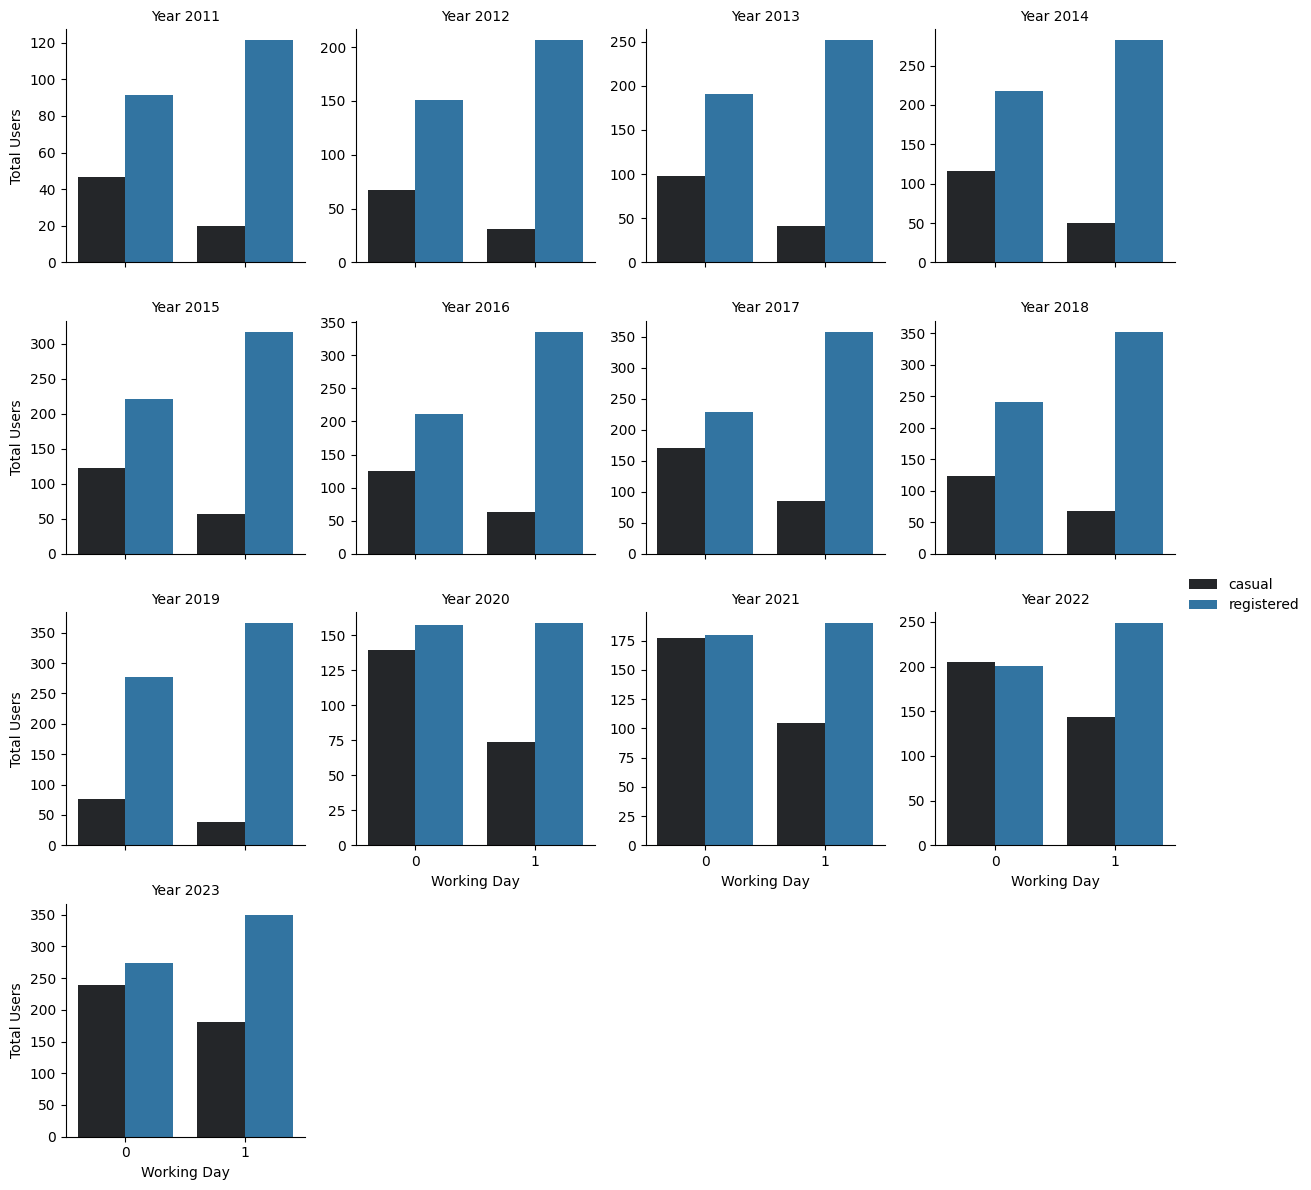

In [ ]:
# 1. 연도별(year) 패널 생성
g = sns.FacetGrid(
    bike_long,
    col="year",
    col_wrap=4,
    height=3,
    sharey=False
)

# 2. 선 그래프 대신 막대 그래프(barplot)로 변경
g.map_dataframe(
    sns.barplot,       # lineplot -> barplot 으로 변경!
    x="workingday",    # 범주형 변수인 날씨(1~4)
    y="total_users",
    hue="user_type",
    errorbar=None      # 막대 위에 생기는 검은 선(신뢰구간)을 없애서 깔끔하게 보려면 추가 (원하면 빼도 됩니다)
)

g.add_legend()
g.set_axis_labels("Working Day", "Total Users")
g.set_titles("Year {col_name}")

plt.show()
plt.close('all')

c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0

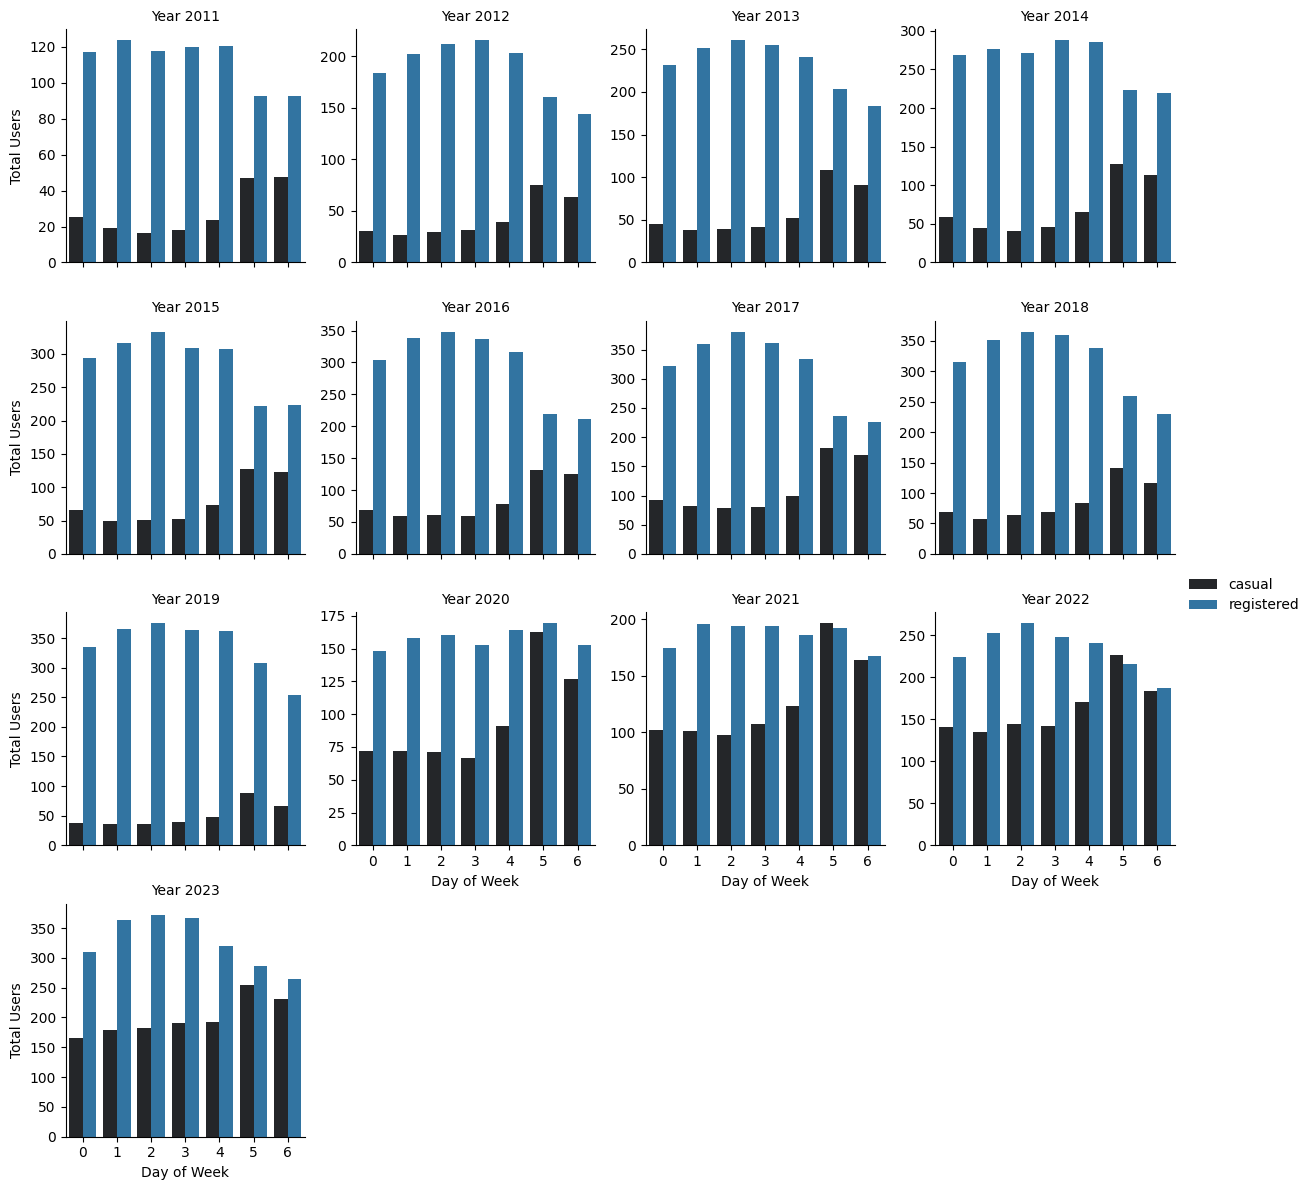

In [ ]:
# 1. 연도별(year) 패널 생성
g = sns.FacetGrid(
    bike_long,
    col="year",
    col_wrap=4,
    height=3,
    sharey=False
)

# 2. 선 그래프 대신 막대 그래프(barplot)로 변경
g.map_dataframe(
    sns.barplot,       # lineplot -> barplot 으로 변경!
    x="dayofweek",    # 범주형 변수인 날씨(1~4)
    y="total_users",
    hue="user_type",
    errorbar=None      # 막대 위에 생기는 검은 선(신뢰구간)을 없애서 깔끔하게 보려면 추가 (원하면 빼도 됩니다)
)

g.add_legend()
g.set_axis_labels("Day of Week", "Total Users")
g.set_titles("Year {col_name}")

plt.show()
plt.close('all')

In [ ]:
# 1. 연도별(year) 패널 생성
g = sns.FacetGrid(
    bike_long,
    col="year",
    col_wrap=4,
    height=3,
    sharey=False
)

# 2. 선 그래프 대신 막대 그래프(barplot)로 변경
g.map_dataframe(
    sns.barplot,       # lineplot -> barplot 으로 변경!
    x="dayofweek",    # 범주형 변수인 날씨(1~4)
    y="total_users",
    hue="user_type",
    errorbar=None      # 막대 위에 생기는 검은 선(신뢰구간)을 없애서 깔끔하게 보려면 추가 (원하면 빼도 됩니다)
)

g.add_legend()
g.set_axis_labels("Day of Week", "Total Users")
g.set_titles("Year {col_name}")

plt.show()
plt.close('all')

c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0

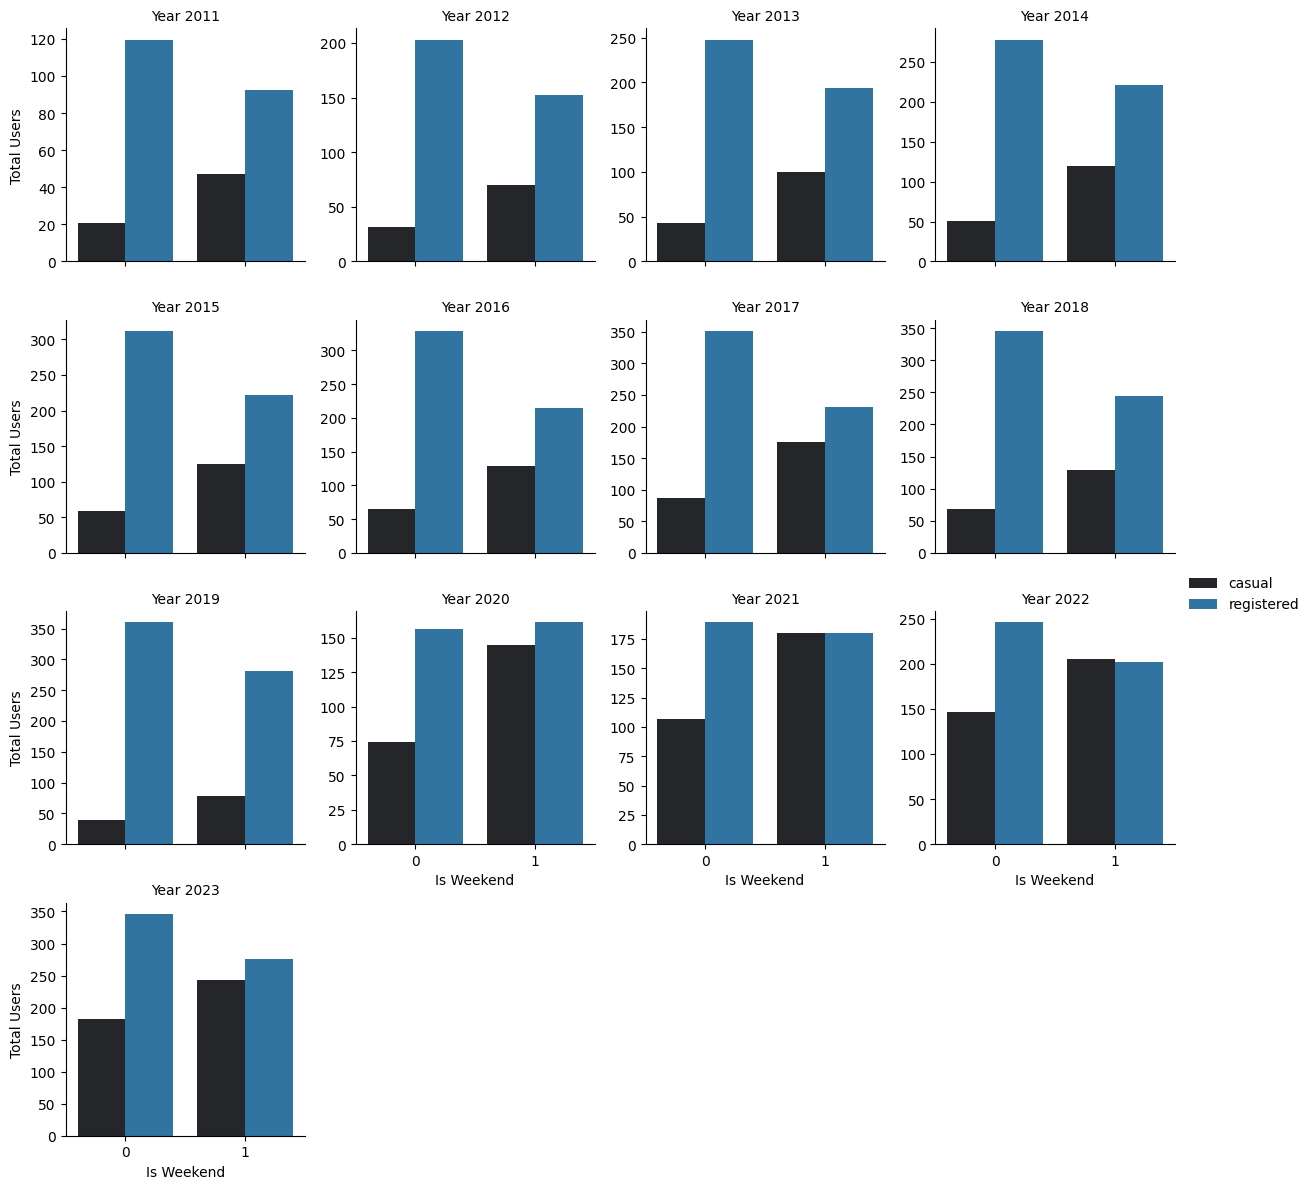

In [ ]:
# 1. 연도별(year) 패널 생성
g = sns.FacetGrid(
    bike_long,
    col="year",
    col_wrap=4,
    height=3,
    sharey=False
)

# 2. 선 그래프 대신 막대 그래프(barplot)로 변경
g.map_dataframe(
    sns.barplot,       # lineplot -> barplot 으로 변경!
    x="is_weekend",    # 범주형 변수인 날씨(1~4)
    y="total_users",
    hue="user_type",
    errorbar=None      # 막대 위에 생기는 검은 선(신뢰구간)을 없애서 깔끔하게 보려면 추가 (원하면 빼도 됩니다)
)

g.add_legend()
g.set_axis_labels("Is Weekend", "Total Users")
g.set_titles("Year {col_name}")

plt.show()
plt.close('all')

In [ ]:
# 2nd Feature engineering
df['hr_sin'] = np.sin(2 * np.pi * df['hr'] / 24)
df['hr_cos'] = np.cos(2 * np.pi * df['hr'] / 24)
df = df.drop(columns=['hr', 'dteday'])

df = df.drop(columns=['feels_like_c'])

## one-hot encoding
cat_features = ['season', 'weathersit', 'dayofweek','month']
df = pd.get_dummies(df, columns=cat_features, prefix=cat_features)
new_cat_cols = [col for col in df.columns if any(p in col for p in cat_features)]
df[new_cat_cols] = df[new_cat_cols].astype(int)



from sklearn.preprocessing import StandardScaler

# 1. 대상 컬럼 분류
# 로그 변환을 수행할 컬럼 (습도 및 타겟)
cols_to_log = ['hum', 'casual', 'registered']
# 로그 없이 바로 스케일링할 컬럼 (기온, 풍속)
cols_to_scale_only = ['temp_c', 'windspeed']

# 2. 선택적 로그 변환 (Log Transformation)
# hum, casual, registered에만 np.log1p 적용
for col in cols_to_log:
    # 혹시 모를 음수 데이터를 대비해 0으로 클리핑 후 로그 적용
    df[col] = np.log1p(df[col].clip(lower=0))

# 3. StandardScaler 적용 (표준화)
# 인풋 피처와 타겟을 위한 스케일러를 각각 생성합니다.
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

# 전체 수치형 피처 리스트 (기온, 습도, 풍속)
all_num_features = ['temp_c', 'hum', 'windspeed', 'hr_sin', 'hr_cos']
targets = ['casual', 'registered']

# 피처 스케일링: 이제 무한대(inf) 에러 없이 깔끔하게 작동합니다.
df[all_num_features] = feature_scaler.fit_transform(df[all_num_features])

# 타겟 스케일링: 모델이 예측하기 좋은 범위(평균 0, 분산 1)로 맞춥니다.
df[targets] = target_scaler.fit_transform(df[targets])


전체 데이터 내 2023년 개수: 7295


In [ ]:
df.columns

Index(['casual', 'registered', 'temp_c', 'hum', 'windspeed', 'holiday',
       'workingday', 'year', 'is_weekend', 'hr_sin', 'hr_cos', 'season_1',
       'season_2', 'season_3', 'season_4', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'dayofweek_0', 'dayofweek_1',
       'dayofweek_2', 'dayofweek_3', 'dayofweek_4', 'dayofweek_5',
       'dayofweek_6', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'],
      dtype='object')

In [ ]:
# # 1. 2021~2023년 데이터만 사용 (이미 필터링 되었다면 생략)
# df_recent = df[df['year'].isin([2021, 2022, 2023])].copy()

# # 2. 2023년 1월 1일을 기준으로 나누기 (또는 2022년 말)
# # 여기서는 2021~2022를 학습, 2023년 1~10월을 검증으로 사용해봅시다.
# train_df = df_recent[df_recent['year'] < 2023]
# val_df = df_recent[(df_recent['year'] == 2023) & (df_recent['month_11'] == 0) & (df_recent['month_12'] == 0)]

# # 3. 피처(X)와 타겟(y) 분리
# # targets = ['casual', 'registered']
# X_train = train_df.drop(columns=['casual', 'registered'])
# y_train = train_df[['casual', 'registered']]

# X_val = val_df.drop(columns=['casual', 'registered'])
# y_val = val_df[['casual', 'registered']]

# print(f"학습 데이터 크기: {X_train.shape}")
# print(f"검증 데이터 크기: {X_val.shape}")

학습 데이터 크기: (17518, 36)
검증 데이터 크기: (7295, 36)


In [ ]:
# 1. 검증셋(Val)은 2023년 1~10월로 공통 유지
val_df = df[(df['year'] == 2023) & (df['month_11'] == 0) & (df['month_12'] == 0)].copy()

X_val = val_df.drop(columns=['casual', 'registered','year'])
y_val = val_df[['casual', 'registered','year']]

# 2. Registered 학습 데이터 (2023년 미만 중 2020년 제외)
train_df_reg = df[(df['year'] < 2023) & (df['year'] != 2020)].copy()
X_train_reg = train_df_reg.drop(columns=['casual', 'registered', 'year'])
y_train_reg_full = train_df_reg[['casual', 'registered']]

# 3. Casual 학습 데이터 (2020년 이후)
train_df_cas = df[(df['year'] >= 2020)].copy()
X_train_cas = train_df_cas.drop(columns=['casual', 'registered', 'year'])
y_train_cas_full = train_df_cas[['casual', 'registered']]

print(f"Registered 학습 데이터: {X_train_reg.shape}")
print(f"Casual 학습 데이터: {X_train_cas.shape}")
print(f"공통 검증 데이터: {X_val.shape}")

Registered 학습 데이터: (96397, 35)
Casual 학습 데이터: (33596, 35)
공통 검증 데이터: (7295, 35)


전체 데이터 내 2023년 개수: 0


In [ ]:
def build_and_train_model(X_train, y_train_target, X_val, y_val_target, target_name):
    print(f"\n========== [ {target_name.upper()} 긴급 복구 모델 학습 시작 ] ==========")

    model = Sequential()
    # model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

    # # 1. Dropout 완화: 0.5 -> 0.2 (정형 데이터에 맞는 수준)
    # model.add(Dropout(0.2))

    # model.add(Dense(256, activation='relu'))
    # model.add(Dense(64, activation='leaky_relu'))
    # model.add(Dense(1))
    # 1. 입력층 & 첫 번째 은닉층 (정보 확장)
    model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))

    # 2. 두 번째 은닉층 (가장 두꺼운 층)
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))

    # 3. 세 번째 은닉층 (압축 시작)
    model.add(Dense(128, activation='leaky_relu'))

    # 4. 네 번째 은닉층
    model.add(Dense(64, activation='leaky_relu'))

    # 5. 출력층 (활성화 함수 없음)
    model.add(Dense(1))

    opt = keras.optimizers.Adam(learning_rate=0.0005)
    model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])

    early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30, restore_best_weights=True)

    history = model.fit(
        X_train, y_train_target,
        epochs=1000,
        validation_data=(X_val, y_val_target),
        batch_size=64, # 2. 배치 사이즈 확대 (20 -> 64)로 안정적인 학습 유도
        callbacks=[early_stop],
        shuffle=True,  # 3. ★ 핵심! 에폭 내부에서는 데이터를 마구 섞어서 편식을 막습니다.
        verbose=1
    )

    return model, history



In [ ]:
# # 1. Registered 타겟 데이터 분리
# y_train_reg = y_train['registered']
# y_val_reg = y_val['registered']

# # 2. 모델 학습
# model_reg, history_reg = build_and_train_model(X_train, y_train_reg, X_val, y_val_reg, 'registered')

# 1. Registered 타겟 데이터 분리
y_train_reg = y_train_reg_full['registered']
y_val_reg = y_val['registered']

# 2. 모델 학습 (X_train_reg 사용)
model_reg, history_reg = build_and_train_model(X_train_reg, y_train_reg, X_val, y_val_reg, 'registered')

# (이후 역변환 및 성능 평가 코드는 기존과 100% 동일하게 진행하시면 됩니다)

# 3. 예측 및 역변환 (StandardScaler -> Log -> Real Count)
pred_reg_scaled = model_reg.predict(X_val).flatten()

# target_scaler는 두 개의 컬럼(casual, registered)을 기준으로 학습되었으므로,
# registered(인덱스 1)의 역변환을 위해 임시로 0으로 채운 2D 배열을 만듭니다.
dummy_array_reg = np.zeros((len(pred_reg_scaled), 2))
dummy_array_reg[:, 1] = pred_reg_scaled
pred_reg_log = target_scaler.inverse_transform(dummy_array_reg)[:, 1]
pred_reg_real = np.expm1(pred_reg_log)

# 실제 정답 역변환
dummy_actual_reg = np.zeros((len(y_val_reg), 2))
dummy_actual_reg[:, 1] = y_val_reg.values
actual_reg_log = target_scaler.inverse_transform(dummy_actual_reg)[:, 1]
actual_reg_real = np.expm1(actual_reg_log)

# 4. 성능 평가 ($RMSE$ 및 $R^2$)
rmse_reg = root_mean_squared_error(actual_reg_real, pred_reg_real)
r2_reg = r2_score(actual_reg_real, pred_reg_real)
print(f"Registered RMSE: {rmse_reg:.2f}")
print(f"Registered R2: {r2_reg:.4f}")


========== [ REGISTERED 긴급 복구 모델 학습 시작 ] ==========
Epoch 1/1000


c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1507/1507 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1593 - mse: 0.1593 - val_loss: 0.0923 - val_mse: 0.0923
Epoch 2/1000
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1210 - mse: 0.1210 - val_loss: 0.1064 - val_mse: 0.1064
Epoch 3/1000
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1154 - mse: 0.1154 - val_loss: 0.0653 - val_mse: 0.0653
Epoch 4/1000
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1114 - mse: 0.1114 - val_loss: 0.0687 - val_mse: 0.0687
Epoch 5/1000
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1078 - mse: 0.1078 - val_loss: 0.0996 - val_mse: 0.0996
Epoch 6/1000
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1068 - mse: 0.1068 - val_loss: 0.0947 - val_mse: 0.0947
Epoch 7/1000
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1045 - mse: 0.1045 - val_loss: 0.0784 - val_mse: 0.0784
Epoch 8/1000
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1036 - mse: 0.1036 - val_loss: 0.0848 - val_mse: 0.0848
Epoch 9/1000
1507/1507 ━━━━━━━━━━━━━━

In [ ]:
# # 1. Casual 타겟 데이터 분리
# y_train_cas = y_train['casual']
# y_val_cas = y_val['casual']

# # 2. 모델 학습
# model_cas, history_cas = build_and_train_model(X_train, y_train_cas, X_val, y_val_cas, 'casual')

# 1. Casual 타겟 데이터 분리
y_train_cas = y_train_cas_full['casual']
y_val_cas = y_val['casual']

# 2. 모델 학습 (X_train_cas 사용)
model_cas, history_cas = build_and_train_model(X_train_cas, y_train_cas, X_val, y_val_cas, 'casual')

# 3. 예측 및 역변환
pred_cas_scaled = model_cas.predict(X_val).flatten()

# casual(인덱스 0)의 역변환을 위한 임시 배열
dummy_array_cas = np.zeros((len(pred_cas_scaled), 2))
dummy_array_cas[:, 0] = pred_cas_scaled
pred_cas_log = target_scaler.inverse_transform(dummy_array_cas)[:, 0]
pred_cas_real = np.expm1(pred_cas_log)

# 실제 정답 역변환
dummy_actual_cas = np.zeros((len(y_val_cas), 2))
dummy_actual_cas[:, 0] = y_val_cas.values
actual_cas_log = target_scaler.inverse_transform(dummy_actual_cas)[:, 0]
actual_cas_real = np.expm1(actual_cas_log)

# 4. 성능 평가
rmse_cas = root_mean_squared_error(actual_cas_real, pred_cas_real)
r2_cas = r2_score(actual_cas_real, pred_cas_real)
print(f"Casual RMSE: {rmse_cas:.2f}")
print(f"Casual R2: {r2_cas:.4f}")


========== [ CASUAL 긴급 복구 모델 학습 시작 ] ==========
Epoch 1/1000


c:\Users\ldsyc\anaconda3\envs\student_env\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1915 - mse: 0.1915 - val_loss: 0.1042 - val_mse: 0.1042
Epoch 2/1000
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1501 - mse: 0.1501 - val_loss: 0.1238 - val_mse: 0.1238
Epoch 3/1000
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1411 - mse: 0.1411 - val_loss: 0.1021 - val_mse: 0.1021
Epoch 4/1000
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1361 - mse: 0.1361 - val_loss: 0.1069 - val_mse: 0.1069
Epoch 5/1000
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1325 - mse: 0.1325 - val_loss: 0.0980 - val_mse: 0.0980
Epoch 6/1000
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1274 - mse: 0.1274 - val_loss: 0.1305 - val_mse: 0.1305
Epoch 7/1000
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1248 - mse: 0.1248 - val_loss: 0.0991 - val_mse: 0.0991
Epoch 8/1000
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1223 - mse: 0.1223 - val_loss: 0.1064 - val_mse: 0.1064
Epoch 9/1000
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


========== [ 최종 TOTAL RENT 성능 평가 ] ==========
Total Rent RMSE: 150.48
Total Rent R2 Score: 0.8853


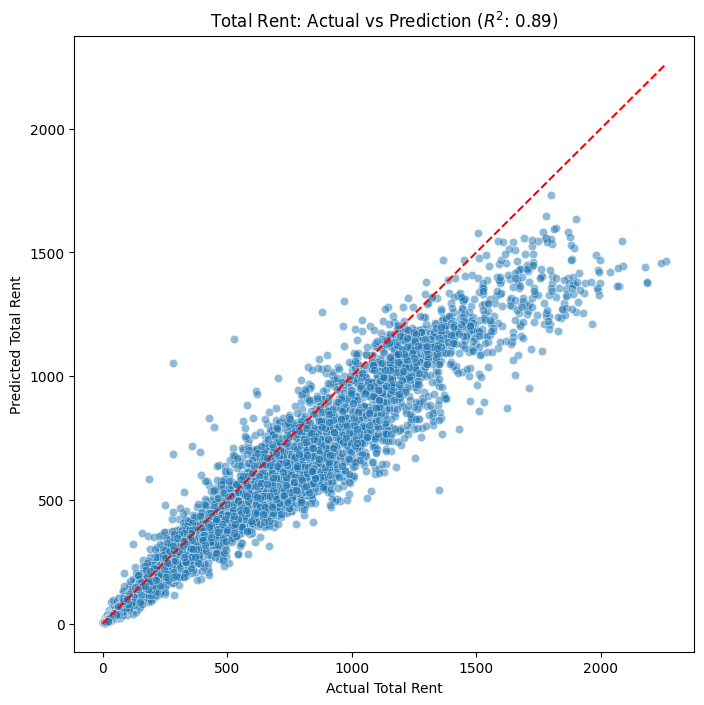

        total_rent_actual  total_rent_pred  difference
105180              134.0       151.106573  -17.106573
105181              196.0       168.504581   27.495419
105182              181.0       144.258712   36.741288
105183               80.0        83.067461   -3.067461
105184               26.0        25.104542    0.895458
105185               21.0        13.496214    7.503786
105186               38.0        30.043409    7.956591
105187               45.0        36.431747    8.568253
105188               92.0       112.567170  -20.567170
105189              190.0       245.440292  -55.440292


In [ ]:
# 1. 최종 결과를 담을 DataFrame 생성 (원본 X_val의 인덱스 유지)
final_results = pd.DataFrame(index=X_val.index)

# 2. 각각 복구된 실제값(Actual)과 예측값(Predicted) 입력
final_results['casual_actual'] = actual_cas_real
final_results['registered_actual'] = actual_reg_real
final_results['casual_pred'] = pred_cas_real
final_results['registered_pred'] = pred_reg_real

# 3. Total Rent 계산
final_results['total_rent_actual'] = final_results['casual_actual'] + final_results['registered_actual']
final_results['total_rent_pred'] = final_results['casual_pred'] + final_results['registered_pred']
final_results['difference'] = final_results['total_rent_actual'] - final_results['total_rent_pred']

# 4. 최종 성능 평가 지표
total_rmse = root_mean_squared_error(final_results['total_rent_actual'], final_results['total_rent_pred'])
total_r2 = r2_score(final_results['total_rent_actual'], final_results['total_rent_pred'])

print("\n========== [ 최종 TOTAL RENT 성능 평가 ] ==========")
print(f"Total Rent RMSE: {total_rmse:.2f}")
print(f"Total Rent R2 Score: {total_r2:.4f}")

# 5. 산점도 시각화 (제공하신 스타일 적용)
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(data=final_results, x='total_rent_actual', y='total_rent_pred', alpha=0.5)

# 기준선(y=x) 그리기
max_val = max(final_results['total_rent_actual'].max(), final_results['total_rent_pred'].max())
xlims = (0, max_val)
ax.plot(xlims, xlims, color='r', linestyle='--')

plt.title(f"Total Rent: Actual vs Prediction ($R^2$: {total_r2:.2f})")
plt.xlabel("Actual Total Rent")
plt.ylabel("Predicted Total Rent")
plt.show()

# 데이터프레임 결과 확인
print(final_results[['total_rent_actual', 'total_rent_pred', 'difference']].head(10))

#

# Mini Holdout


In [ ]:
# 1. Mini 데이터 로드
mini = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv")

# 2. Feature Engineering (year 관련 로직 완전 삭제)
mini['dteday'] = pd.to_datetime(mini['dteday'])
mini['month'] = mini['dteday'].dt.month
mini['dayofweek'] = mini['dteday'].dt.dayofweek
mini['is_weekend'] = mini['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# 3. Cyclic Engineering & Drop
mini['hr_sin'] = np.sin(2 * np.pi * mini['hr'] / 24)
mini['hr_cos'] = np.cos(2 * np.pi * mini['hr'] / 24)

# 학습에 사용하지 않은 컬럼들 깔끔하게 삭제 (원본 데이터에 year가 있다면 같이 날림)
drop_cols = ['hr', 'dteday', 'feels_like_c', 'year']
mini = mini.drop(columns=[col for col in drop_cols if col in mini.columns])

# 4. One-Hot Encoding (학습 데이터 컬럼과 맞추기)
cat_features = ['season', 'weathersit', 'dayofweek', 'month']
mini = pd.get_dummies(mini, columns=cat_features, prefix=cat_features)

# [핵심] 학습 데이터(X_train_reg)에만 있고 mini에는 없는 원-핫 컬럼 0으로 채우기
for col in X_train_reg.columns:
    if col not in mini.columns:
        mini[col] = 0

# 컬럼 순서 고정 및 복사 (Pandas 경고 방지용 .copy() 추가)
X_mini = mini[X_train_reg.columns].copy()

# 5. Scaling (수치형 변수만 골라서 transform 수행)
# hum은 로그 변환 먼저 수행
X_mini['hum'] = np.log1p(X_mini['hum'].clip(lower=0))

# [주의] year가 빠진 피처 리스트 사용!
all_num_features = ['temp_c', 'hum', 'windspeed', 'hr_sin', 'hr_cos']
X_mini[all_num_features] = feature_scaler.transform(X_mini[all_num_features])

# 6. 예측 (Registered & Casual 각각 독립 수행)
pred_reg_scaled = model_reg.predict(X_mini).flatten()
pred_cas_scaled = model_cas.predict(X_mini).flatten()

# 7. 역변환 (Target Scaler 복구 -> np.expm1 복구)
# Registered 역변환
dummy_reg = np.zeros((len(pred_reg_scaled), 2))
dummy_reg[:, 1] = pred_reg_scaled
pred_reg_real = np.expm1(target_scaler.inverse_transform(dummy_reg)[:, 1])

# Casual 역변환
dummy_cas = np.zeros((len(pred_cas_scaled), 2))
dummy_cas[:, 0] = pred_cas_scaled
pred_cas_real = np.expm1(target_scaler.inverse_transform(dummy_cas)[:, 0])

# # 8. 최종 합산 및 저장
# # 두 예측값을 합치고 혹시 모를 음수는 0으로 클리핑 처리
# final_output = pd.DataFrame({
#     'predictions': np.maximum(0, pred_reg_real) + np.maximum(0, pred_cas_real)
# })

# # CSV로 저장 (인덱스 제외)
# final_output.to_csv('predictions.csv', index=False)

# print("✅ 'year'를 완벽히 제외한 predictions.csv 저장 완료!")
# print(final_output.head())
output_for_analysis = pd.DataFrame({
    'pred_reg': np.maximum(0, pred_reg_real),
    'pred_cas': np.maximum(0, pred_cas_real)
})

# 나중에 수동 합산을 위해 'predictions' 컬럼은 일단 기본 합계(1:1)로 만들어 둡니다.
output_for_analysis['predictions'] = output_for_analysis['pred_reg'] + output_for_analysis['pred_cas']

# 분석용 CSV 저장 (모든 컬럼 포함)
output_for_analysis.to_csv('mini_results.csv', index=False)

print("✅ 'mini_results.csv' 저장 완료! (pred_reg, pred_cas 포함)")
print("이 파일을 엑셀에서 열어 직접 계수를 조정하며 검토하세요.")
print(output_for_analysis.head())

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
✅ 'mini_results.csv' 저장 완료! (pred_reg, pred_cas 포함)
이 파일을 엑셀에서 열어 직접 계수를 조정하며 검토하세요.
    pred_reg   pred_cas  predictions
0  33.191908  43.917424    77.109331
1  13.176737  22.826810    36.003547
2   6.394246   6.417383    12.811629
3   3.560739   6.625443    10.186182
4   6.565416   4.935760    11.501176


In [ ]:
# 1. holdout 데이터 로드
holdout = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv")

# 2. Feature Engineering (year 관련 로직 완전 삭제)
holdout['dteday'] = pd.to_datetime(holdout['dteday'])
holdout['month'] = holdout['dteday'].dt.month
holdout['dayofweek'] = holdout['dteday'].dt.dayofweek
holdout['is_weekend'] = holdout['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# 3. Cyclic Engineering & Drop
holdout['hr_sin'] = np.sin(2 * np.pi * holdout['hr'] / 24)
holdout['hr_cos'] = np.cos(2 * np.pi * holdout['hr'] / 24)

# 학습에 사용하지 않은 컬럼들 깔끔하게 삭제 (원본 데이터에 year가 있다면 같이 날림)
drop_cols = ['hr', 'dteday', 'feels_like_c', 'year']
holdout = holdout.drop(columns=[col for col in drop_cols if col in holdout.columns])

# 4. One-Hot Encoding (학습 데이터 컬럼과 맞추기)
cat_features = ['season', 'weathersit', 'dayofweek', 'month']
holdout = pd.get_dummies(holdout, columns=cat_features, prefix=cat_features)

# [핵심] 학습 데이터(X_train_reg)에만 있고 holdout에는 없는 원-핫 컬럼 0으로 채우기
for col in X_train_reg.columns:
    if col not in holdout.columns:
        holdout[col] = 0

# 컬럼 순서 고정 및 복사 (Pandas 경고 방지용 .copy() 추가)
X_holdout = holdout[X_train_reg.columns].copy()

# 5. Scaling (수치형 변수만 골라서 transform 수행)
# hum은 로그 변환 먼저 수행
X_holdout['hum'] = np.log1p(X_holdout['hum'].clip(lower=0))

# [주의] year가 빠진 피처 리스트 사용!
all_num_features = ['temp_c', 'hum', 'windspeed', 'hr_sin', 'hr_cos']
X_holdout[all_num_features] = feature_scaler.transform(X_holdout[all_num_features])

# 6. 예측 (Registered & Casual 각각 독립 수행)
pred_reg_scaled = model_reg.predict(X_holdout).flatten()
pred_cas_scaled = model_cas.predict(X_holdout).flatten()

# 7. 역변환 (Target Scaler 복구 -> np.expm1 복구)
# Registered 역변환
dummy_reg = np.zeros((len(pred_reg_scaled), 2))
dummy_reg[:, 1] = pred_reg_scaled
pred_reg_real = np.expm1(target_scaler.inverse_transform(dummy_reg)[:, 1])

# Casual 역변환
dummy_cas = np.zeros((len(pred_cas_scaled), 2))
dummy_cas[:, 0] = pred_cas_scaled
pred_cas_real = np.expm1(target_scaler.inverse_transform(dummy_cas)[:, 0])

# # 8. 최종 합산 및 저장
# # 두 예측값을 합치고 혹시 모를 음수는 0으로 클리핑 처리
# final_output = pd.DataFrame({
#     'predictions': np.maximum(0, pred_reg_real) + np.maximum(0, pred_cas_real)
# })

# # CSV로 저장 (인덱스 제외)
# final_output.to_csv('predictions.csv', index=False)

# print("✅ 'year'를 완벽히 제외한 predictions.csv 저장 완료!")
# print(final_output.head())
output_for_analysis = pd.DataFrame({
    'pred_reg': np.maximum(0, pred_reg_real),
    'pred_cas': np.maximum(0, pred_cas_real)
})

# 나중에 수동 합산을 위해 'predictions' 컬럼은 일단 기본 합계(1:1)로 만들어 둡니다.
output_for_analysis['predictions'] = output_for_analysis['pred_reg'] + output_for_analysis['pred_cas']

# 분석용 CSV 저장 (모든 컬럼 포함)
output_for_analysis.to_csv('holdout_results.csv', index=False)

print("✅ 'holdout_results.csv' 저장 완료! (pred_reg, pred_cas 포함)")
print("이 파일을 엑셀에서 열어 직접 계수를 조정하며 검토하세요.")
print(output_for_analysis.head())

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step
✅ 'holdout_results.csv' 저장 완료! (pred_reg, pred_cas 포함)
이 파일을 엑셀에서 열어 직접 계수를 조정하며 검토하세요.
    pred_reg   pred_cas  predictions
0  32.174089  16.338838    48.512927
1  13.436330   9.513793    22.950124
2   6.678896   5.927337    12.606233
3   3.751255   4.478041     8.229296
4   8.199723   4.708520    12.908243
